In [62]:
from IPython.display import display, HTML

# To display the image
display(HTML("<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>"))

# To display the heading and horizontal lines
display(HTML("<h1><hr style='border:none; height:3px;'><center>Analyse Descriptive</center><hr style='border:none; height:3px;'></h1>"))

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def displayMatrixCorr(df, val_manquante = None):
    # Filtrer les colonnes ayant moins de 400 valeurs manquantes
    if val_manquante == None :
        corr_matrix = df.corr()
    else :
        filtered_df = df.loc[:, df.isnull().sum() < val_manquante]
    
        # Calculer la matrice de corrélation
        corr_matrix = filtered_df.corr()
    
    # Afficher la matrice de corrélation
    plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Matrice de corrélation")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def displayMissingValues(df) :
        # Calculer le nombre de valeurs manquantes par colonne
    missing_values = df.isnull().sum()

    # Créer l'histogramme
    plt.figure(figsize=(10,6))
    bars = plt.bar(missing_values.index, missing_values.values)

    # Ajouter les valeurs exactes au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=5)

    # Rotation des labels de l'axe des x
    plt.xticks(rotation=45, ha='right', fontsize=7)

    # Ajouter un titre et labels des axes
    plt.title(f'Nombre de valeurs manquantes par colonne, nbreligne = {df.shape[0]}')
    plt.ylabel('Nombre de valeurs manquantes')

    # Afficher le graphique
    plt.tight_layout()  # Pour éviter que les labels soient coupés
    plt.show()

    return None

script_dir = Path.cwd()  # Obtenir le répertoire du script

df_raw = pd.read_csv(script_dir.parent / '4 - Dataset' / 'weld_data_raw.csv')
#print('Valeur unique de la colone "Type of weld" from df_raw : ', df_raw['Type of weld'].unique())

# Charger le fichier CSV
df = pd.read_csv(script_dir.parent / '4 - Dataset' / 'weld_data.csv')
df = df.replace(-1, np.nan)

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

In [29]:
df = df.iloc[:,:44]

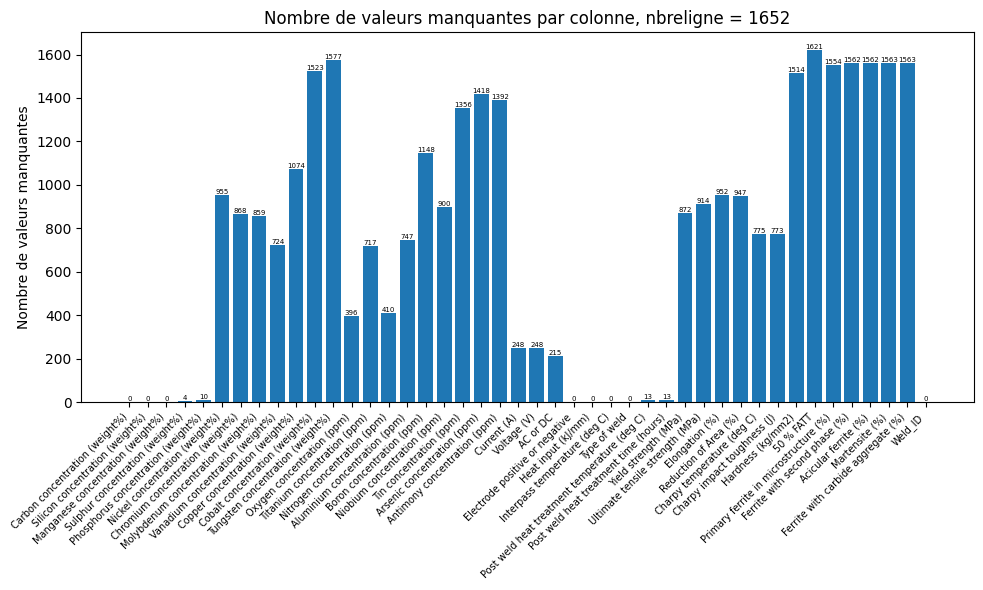

In [30]:
displayMissingValues(df)

In [31]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()  # Obtenir les valeurs uniques de la colonne
        count_N = df[column].value_counts().get(np.nan, 0)
        print(f"Colonne '{column}' : {len(unique_values)} valeurs uniques et {count_N} valeurs manquantes")
        print(unique_values)
        print('-' * 50)

display_unique_values(df)

Colonne 'Carbon concentration (weight%)' : 81 valeurs uniques et 0 valeurs manquantes
[0.037  0.044  0.045  0.039  0.041  0.051  0.049  0.038  0.043  0.053
 0.046  0.048  0.074  0.075  0.076  0.068  0.081  0.079  0.078  0.069
 0.08   0.071  0.072  0.066  0.067  0.09   0.088  0.091  0.089  0.094
 0.086  0.04   0.047  0.052  0.05   0.054  0.073  0.077  0.07   0.062
 0.06   0.055  0.059  0.042  0.058  0.065  0.095  0.151  0.147  0.145
 0.061  0.035  0.1    0.12   0.099  0.093  0.101  0.096  0.097  0.03
 0.032  0.031  0.098  0.13   0.11   0.057  0.15   0.064  0.082  0.036
 0.125  0.105  0.115  0.1055 0.14   0.16   0.084  0.092  0.029  0.063
 0.18  ]
--------------------------------------------------
Colonne 'Silicon concentration (weight%)' : 68 valeurs uniques et 0 valeurs manquantes
[0.3   0.31  0.35  0.33  0.32  0.36  0.29  0.34  0.39  0.44  0.48  0.37
 0.51  0.57  0.27  0.45  0.24  0.41  0.46  0.43  0.42  0.52  0.54  0.18
 0.17  0.2   0.22  0.4   0.26  0.25  0.53  0.38  0.28  0.47  0.2

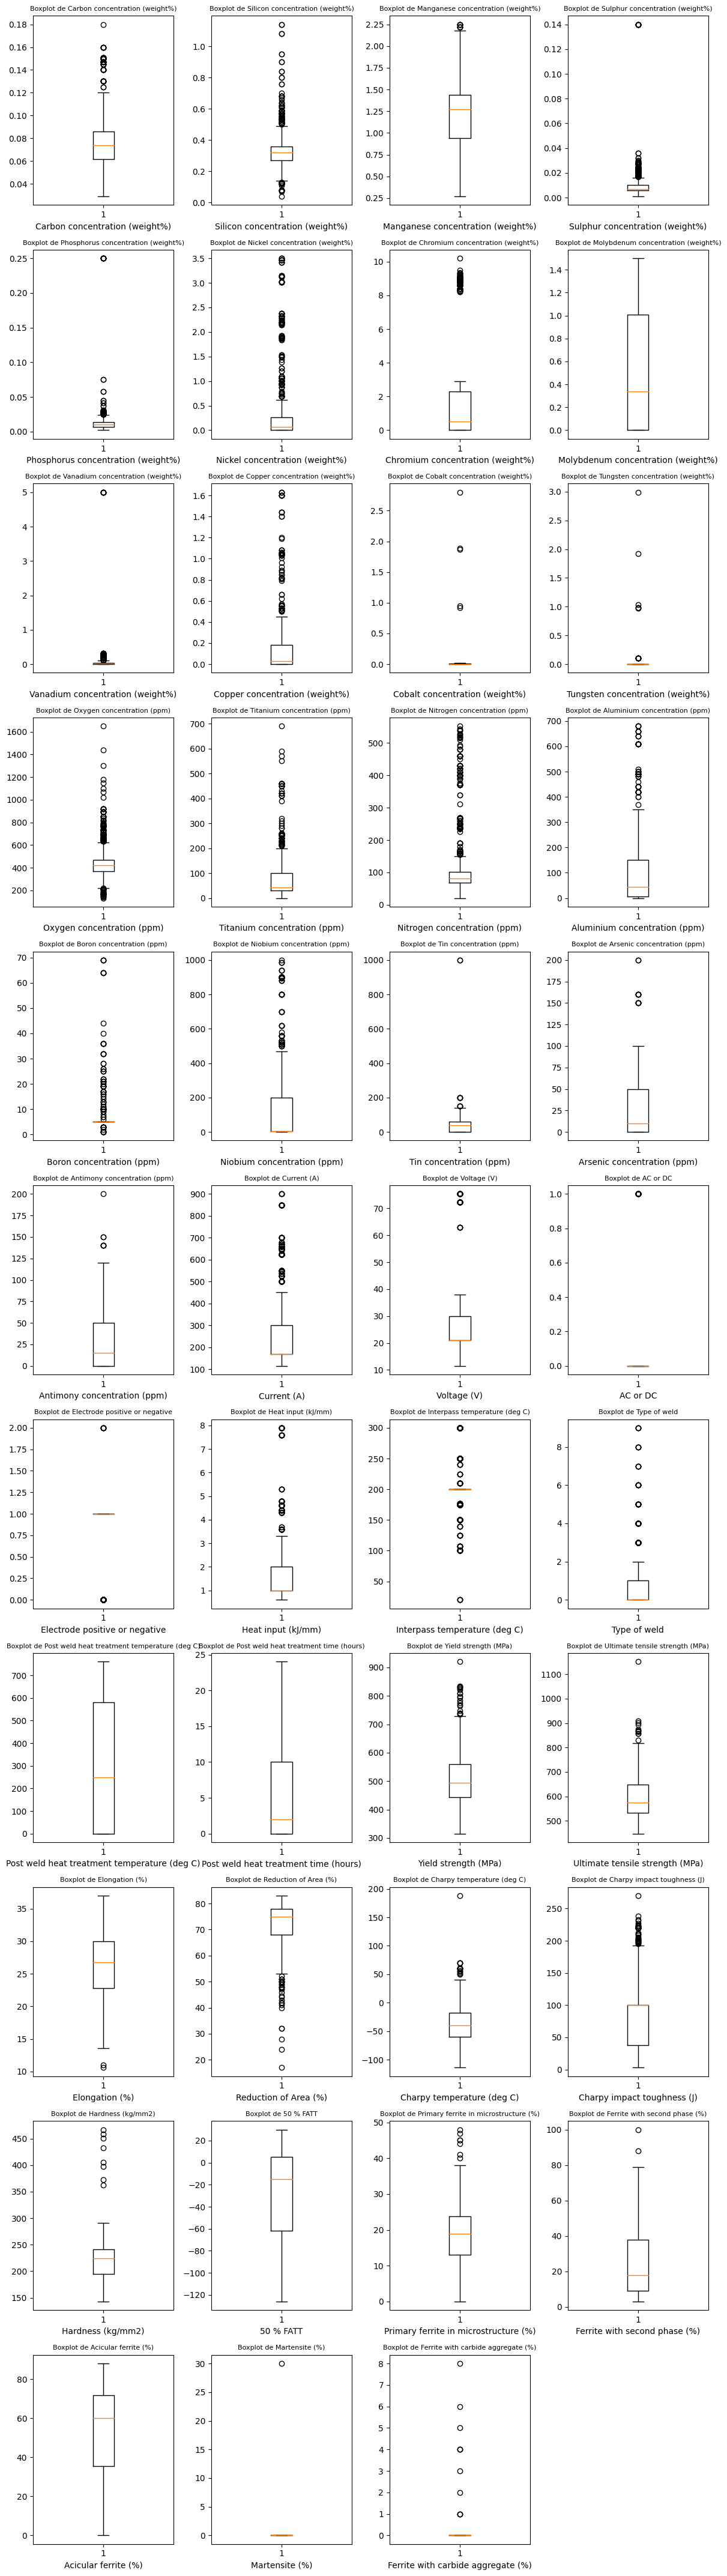

In [32]:
def display_boxplots_no_nan(df):
    # Compteur pour savoir combien de boxplots ont été affichés
    plot_count = 0
    # Création d'une figure avec 4 sous-graphes par ligne (1 ligne, 4 colonnes)
    fig, axes = plt.subplots(nrows=(len(df.columns)+1) // 4, ncols=4, figsize=(12, len(df.columns)))
    
    # Aplatir les axes (au cas où il y ait plusieurs lignes de sous-graphiques)
    axes = axes.flatten()
    
    # Parcourir chaque colonne du dataframe
    for col in df.columns:
        # Retirer les valeurs NaN de la colonne
        non_nan_values = df[col].dropna()
        
        # Vérifier s'il reste des valeurs après avoir retiré les NaN
        if not non_nan_values.empty:
            # Créer un boxplot pour la colonne dans l'axe correspondant
            axes[plot_count].boxplot(non_nan_values)
            
            # Titre du boxplot correspondant à la colonne
            axes[plot_count].set_title(f"Boxplot de {col}", fontsize = 8)
            axes[plot_count].set_xlabel(col)
            
            # Incrémenter le compteur de boxplots
            plot_count += 1
    
    # Supprimer les sous-graphiques inutilisés (s'il y en a)
    for i in range(plot_count, len(axes)):
        if i < len(axes):  # Vérifier que l'index est dans les limites
            fig.delaxes(axes[i])
    
    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()
df_without_ID = df.iloc[:, :-1]
display_boxplots_no_nan(df_without_ID)

In [33]:
def modify_columns_ppm(df):
    # Parcourir toutes les colonnes du dataframe
    df_same_unit = df.copy()
    for col in df_same_unit.columns:
        # Vérifier si "ppm" est présent dans le nom de la colonne et si la colonne n'est pas de type 'object'
        if "ppm" in col and df_same_unit[col].dtype != object:
            # Diviser les valeurs par 10 000
            df_same_unit[col] = df_same_unit[col] / 10000
            
            # Modifier le nom de la colonne, remplacer "ppm" par "%"
            new_col_name = col.replace("ppm", "%")
            df_same_unit.rename(columns={col: new_col_name}, inplace=True)
            
    return df_same_unit

df_same_unit = modify_columns_ppm(df)

"""
first_21_cols = df.iloc[:, :21]
print(first_21_cols.shape[0])
#L = ["Chromium concentration (weight%)"]
L = ["Chromium concentration (weight%)", "Vanadium concentration (weight%)", "Nickel concentration (weight%)"]
for col in L :
    print(f"Nbre avant remove : {first_21_cols[col].count()} ")
    #first_21_cols = remove_outliers_column(first_21_cols, col)
    print(f"Nbre après remove : {first_21_cols[col].count()} \n")

print(first_21_cols.shape[0])

plt.figure(figsize=(15, 7))
    
# Créer le boxplot
df_same_unit.iloc[:,:21].boxplot()

# Ajouter un titre
plt.title('Boxplot des 10 premières colonnes')

# Rotation des labels de l'axe des x
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()"""

'\nfirst_21_cols = df.iloc[:, :21]\nprint(first_21_cols.shape[0])\n#L = ["Chromium concentration (weight%)"]\nL = ["Chromium concentration (weight%)", "Vanadium concentration (weight%)", "Nickel concentration (weight%)"]\nfor col in L :\n    print(f"Nbre avant remove : {first_21_cols[col].count()} ")\n    #first_21_cols = remove_outliers_column(first_21_cols, col)\n    print(f"Nbre après remove : {first_21_cols[col].count()} \n")\n\nprint(first_21_cols.shape[0])\n\nplt.figure(figsize=(15, 7))\n    \n# Créer le boxplot\ndf_same_unit.iloc[:,:21].boxplot()\n\n# Ajouter un titre\nplt.title(\'Boxplot des 10 premières colonnes\')\n\n# Rotation des labels de l\'axe des x\nplt.xticks(rotation=90)\n\n# Afficher le graphique\nplt.show()'

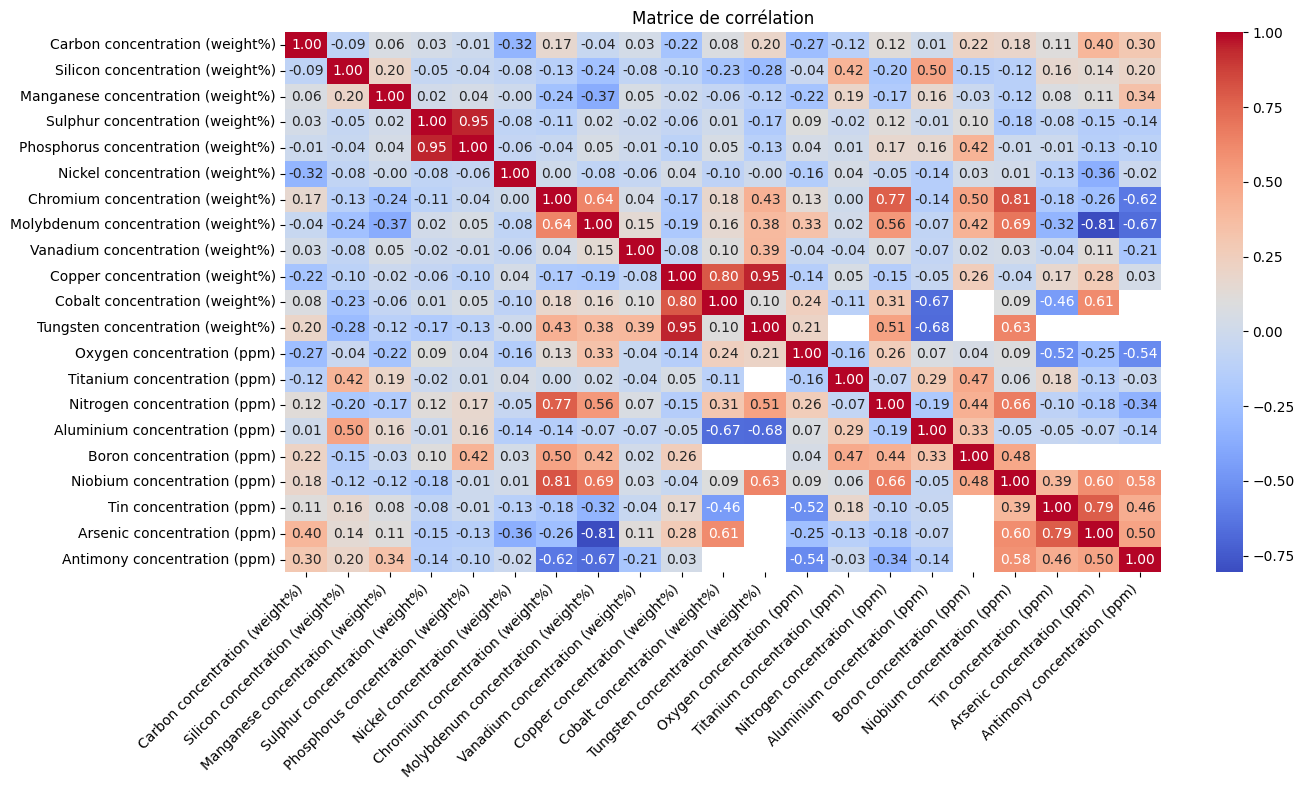

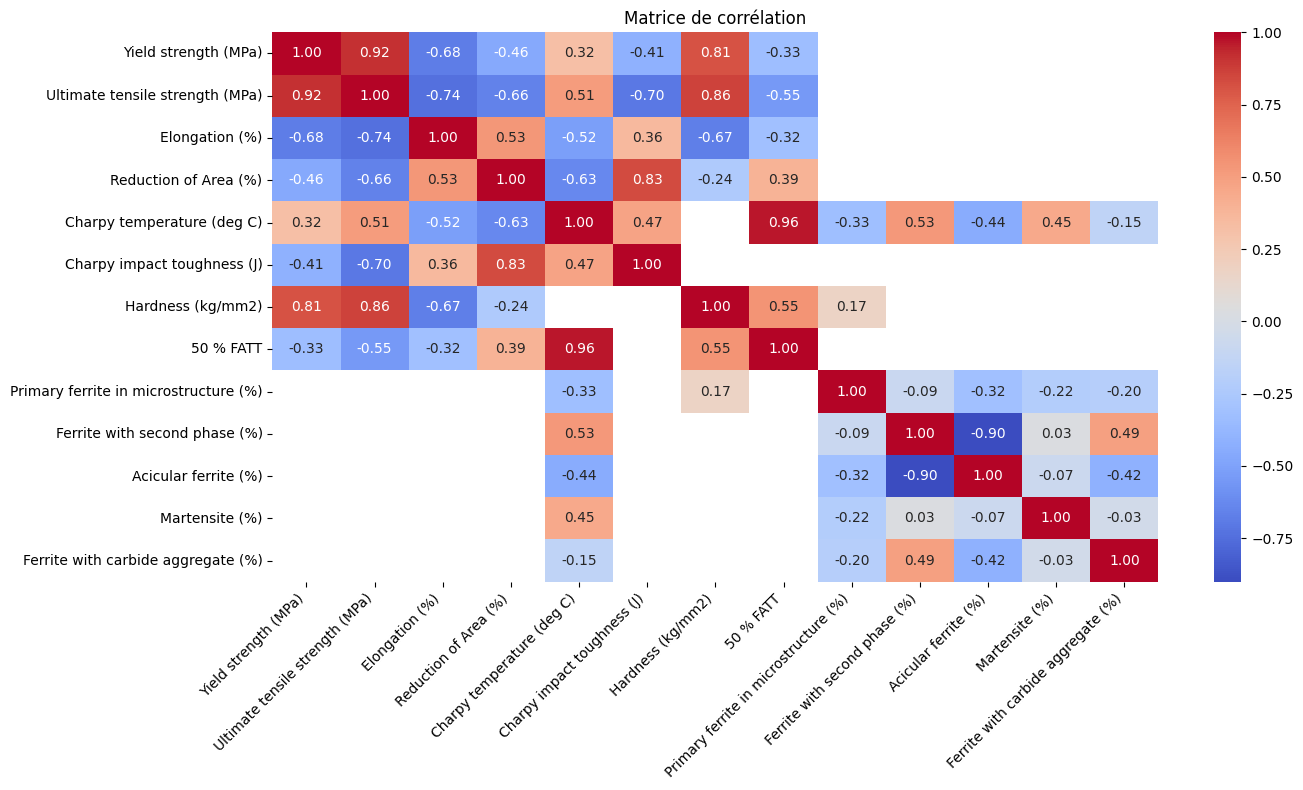

In [34]:
df_without_ID = df.iloc[:, :-1]
df_new = df_without_ID.iloc[:, :9]
df_cleaned = df_new.dropna()
df_chemiCompo = df.iloc[:,:21]
df_chemiCompo_sameUnit = df_same_unit.iloc[:,:21]

df_cleaned1 = df[['Tin concentration (ppm)','Arsenic concentration (ppm)','Antimony concentration (ppm)']].dropna()
#print(df_cleaned1.shape[0])
displayMatrixCorr(df_chemiCompo)
displayMatrixCorr(df.iloc[:,30:43])

<Axes: xlabel='Ferrite with second phase (%)', ylabel='Acicular ferrite (%)'>

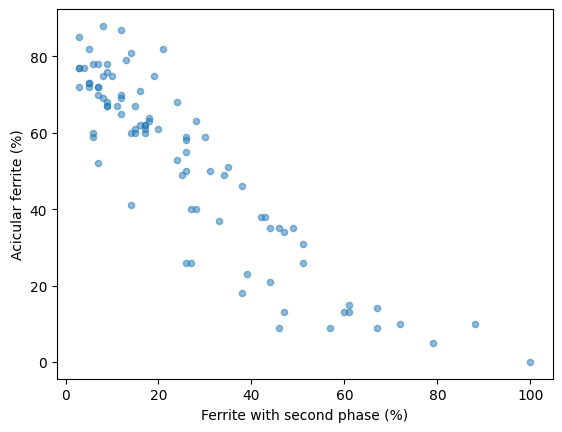

In [35]:
df_without_ID = df.iloc[:, :-1]
df_new = df_without_ID.iloc[:, :43]
#df_cleaned = df_new.dropna()
#df_cleaned_bis = df_cleaned[df_cleaned['Phosphorus concentration (weight%)'] <= 0.10]
df_new.plot(kind="scatter", x="Ferrite with second phase (%)", y="Acicular ferrite (%)",
             alpha=0.5)

In [36]:
def plot_unique_value_histograms(df):
    # Parcourir chaque colonne du DataFrame
    for col in df.columns:
        # Compter le nombre d'occurrences des valeurs uniques dans la colonne
        unique_counts = df[col].value_counts()
        print(df[col].describe())

        # Créer un histogramme
        plt.figure(figsize=(10, 3))
        bars = plt.bar(unique_counts.index.astype(str), unique_counts.values, color='skyblue')

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=8)

        # Ajouter des étiquettes sur les axes et un titre
        plt.xlabel(f'Valeurs uniques de {col}')
        plt.ylabel('Nombre d\'occurrences')
        plt.title(f'Histogramme des valeurs uniques dans {col}')

        # Rotation des labels pour l'axe des x (au cas où il y a beaucoup de valeurs)
        plt.xticks(rotation=45, ha='right')

        # Afficher le graphique
        plt.tight_layout()
        plt.show()
df_end = df.iloc[:, 10:12]
#plot_unique_value_histograms(df_end)
#plot_unique_value_histograms(df.iloc[:,18:22])
#plot_unique_value_histograms(df.iloc[:,:-1])


count    138.000000
mean     226.905797
std       57.748370
min      143.000000
25%      194.500000
50%      224.000000
75%      241.000000
max      467.000000
Name: Hardness (kg/mm2), dtype: float64


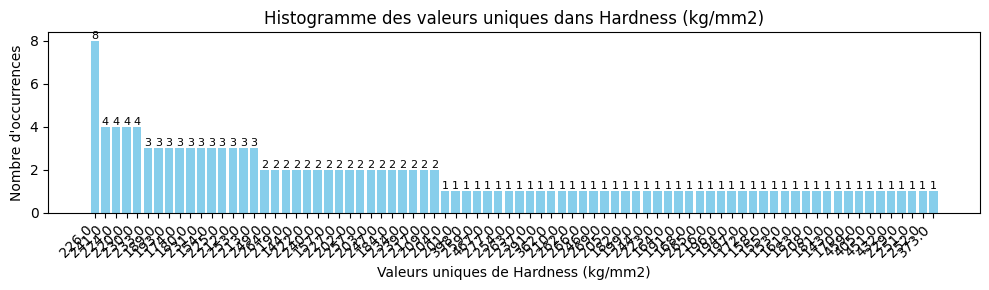

count     31.000000
mean     -31.096774
std       43.644285
min     -126.000000
25%      -62.000000
50%      -15.000000
75%        5.000000
max       30.000000
Name: 50 % FATT, dtype: float64


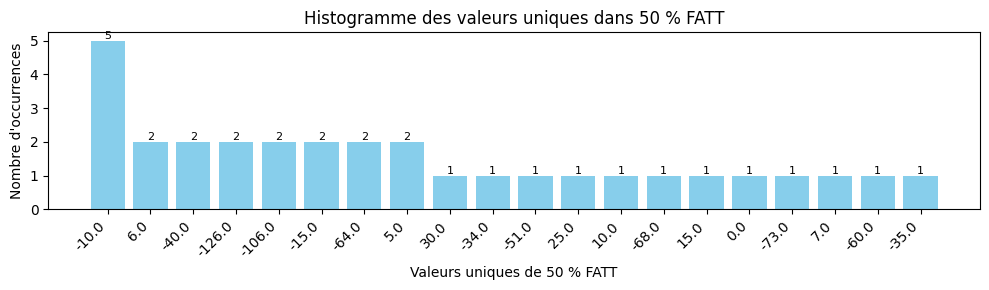

count    98.000000
mean     19.173469
std      10.982672
min       0.000000
25%      13.000000
50%      19.000000
75%      23.750000
max      48.000000
Name: Primary ferrite in microstructure (%), dtype: float64


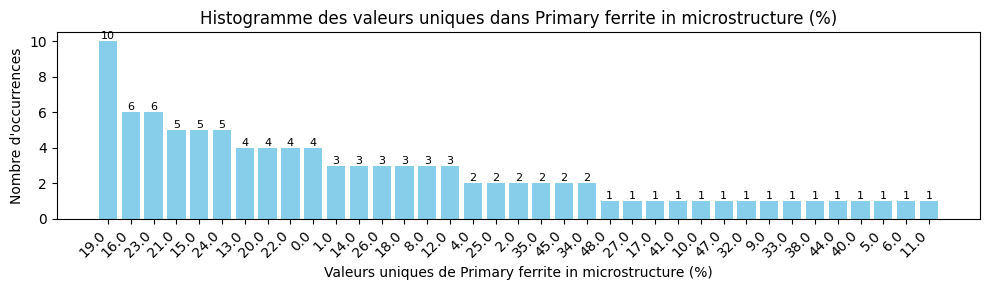

count     90.000000
mean      25.955556
std       21.283486
min        3.000000
25%        9.000000
50%       18.000000
75%       38.000000
max      100.000000
Name: Ferrite with second phase (%), dtype: float64


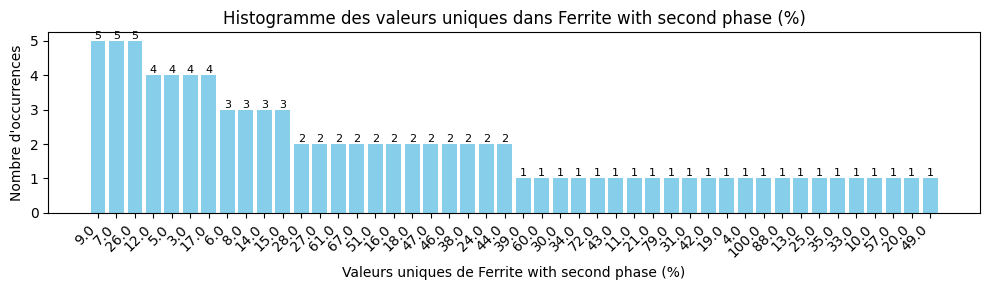

count    90.000000
mean     52.833333
std      23.483798
min       0.000000
25%      35.500000
50%      60.000000
75%      71.750000
max      88.000000
Name: Acicular ferrite (%), dtype: float64


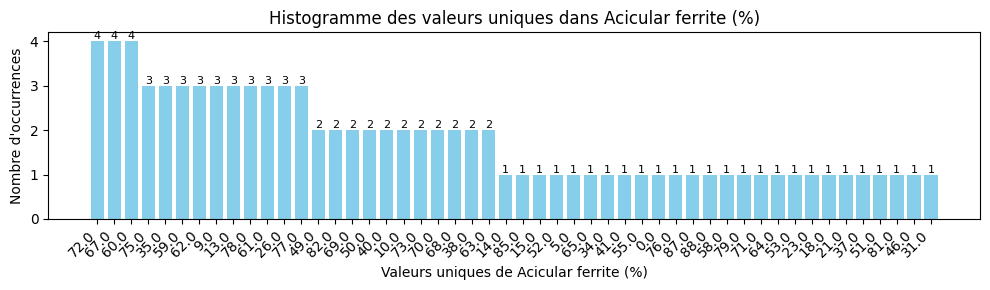

count    89.000000
mean      0.337079
std       3.179994
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      30.000000
Name: Martensite (%), dtype: float64


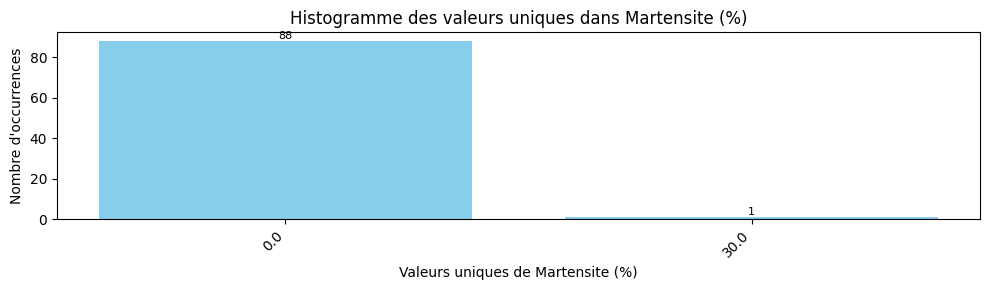

count    89.000000
mean      0.438202
std       1.397685
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000
Name: Ferrite with carbide aggregate (%), dtype: float64


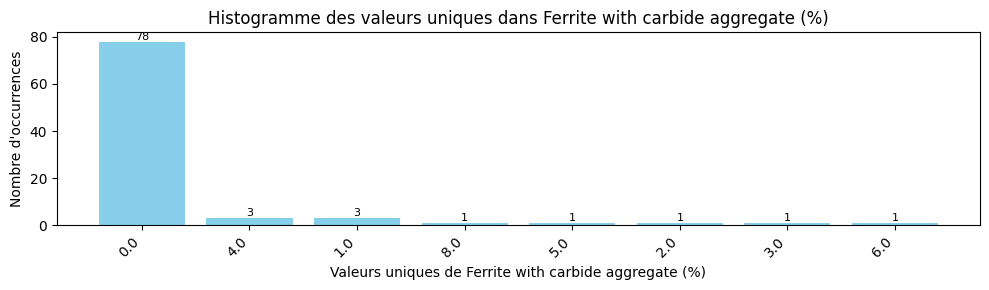

In [37]:
plot_unique_value_histograms(df.iloc[:,36:43])

C:\Users\tonya\AppData\Local\Temp\ipykernel_23756\341315508.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

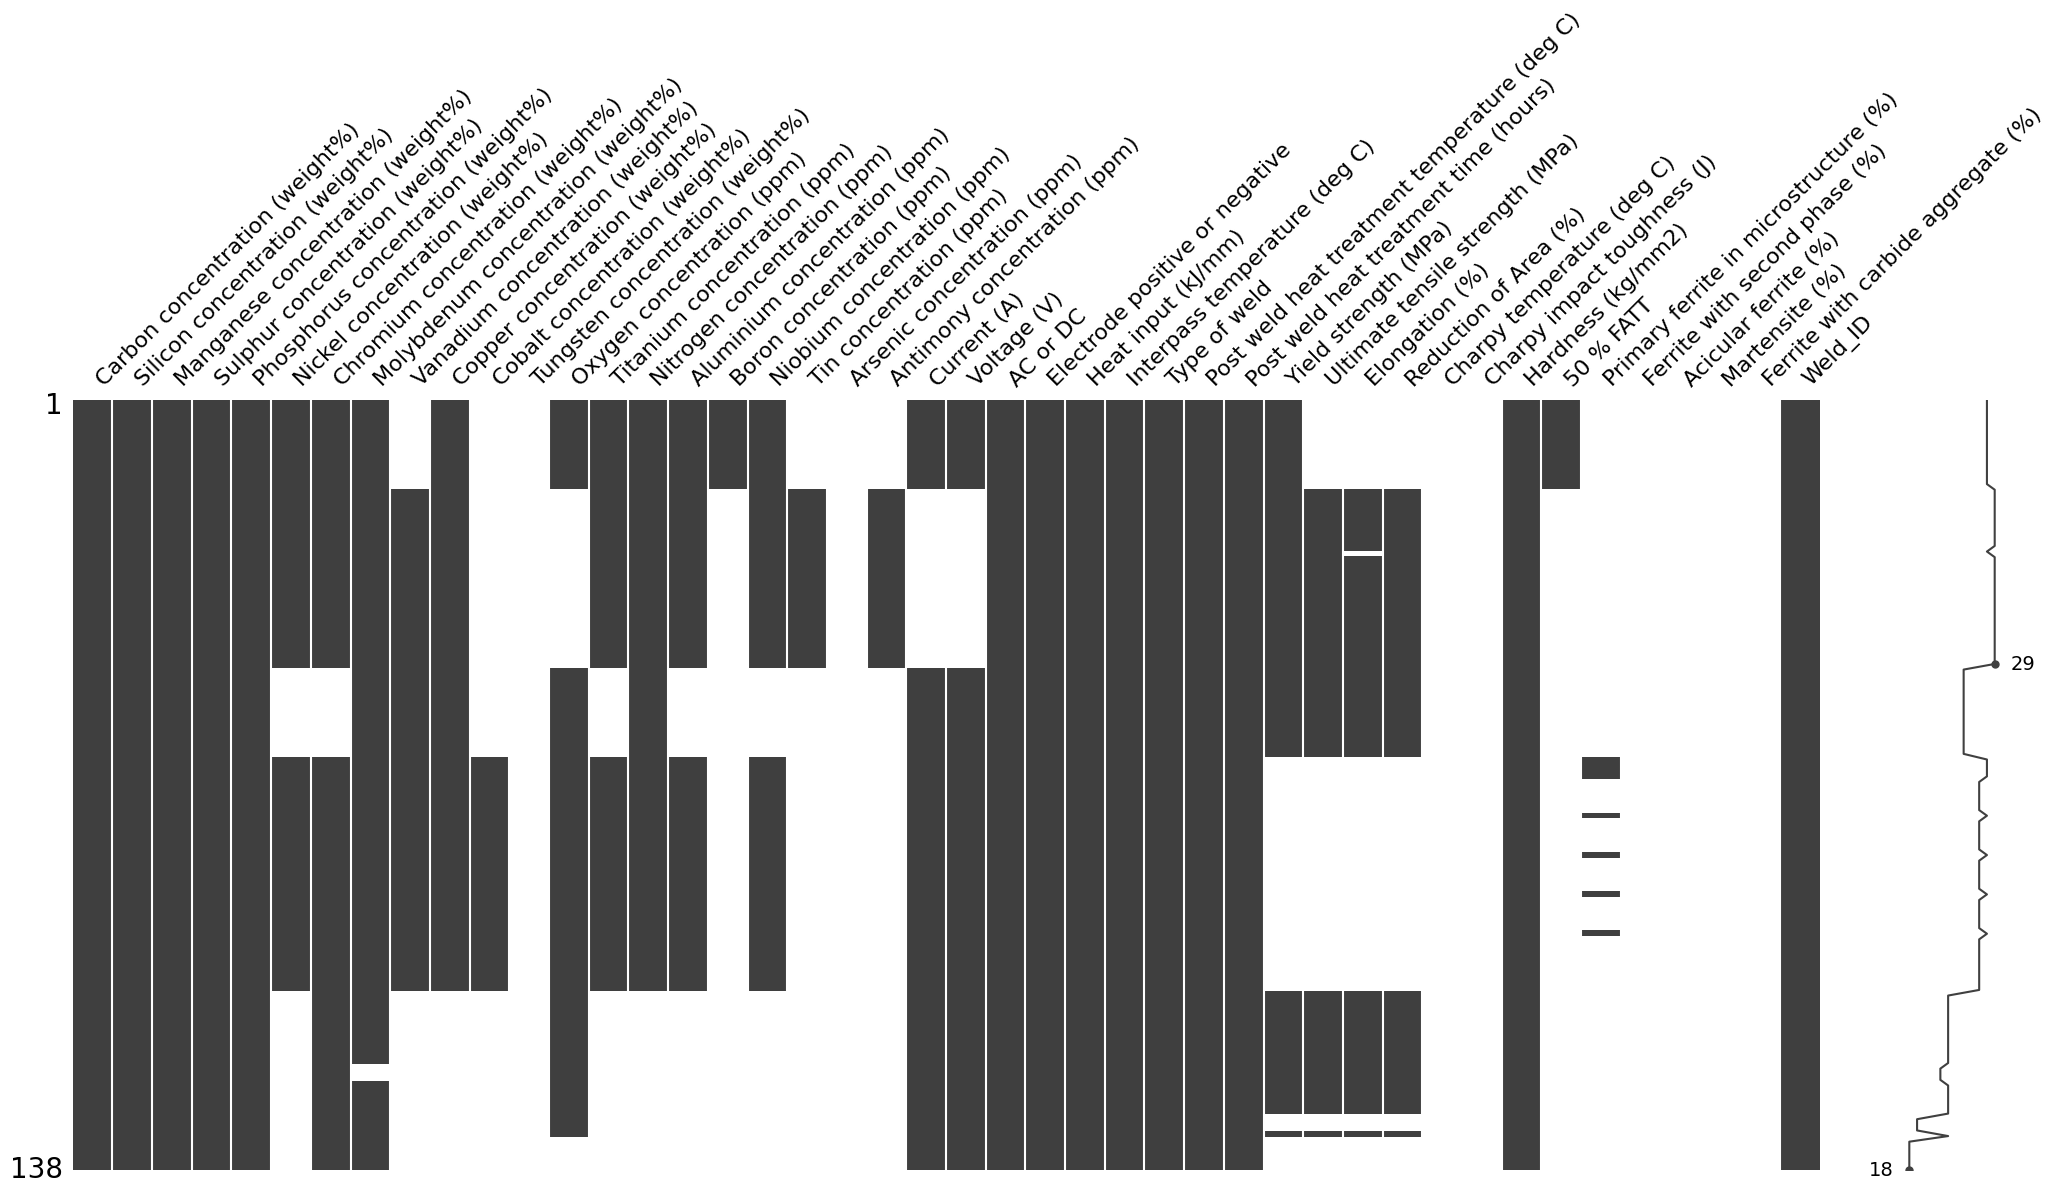

C:\Users\tonya\AppData\Local\Temp\ipykernel_23756\341315508.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

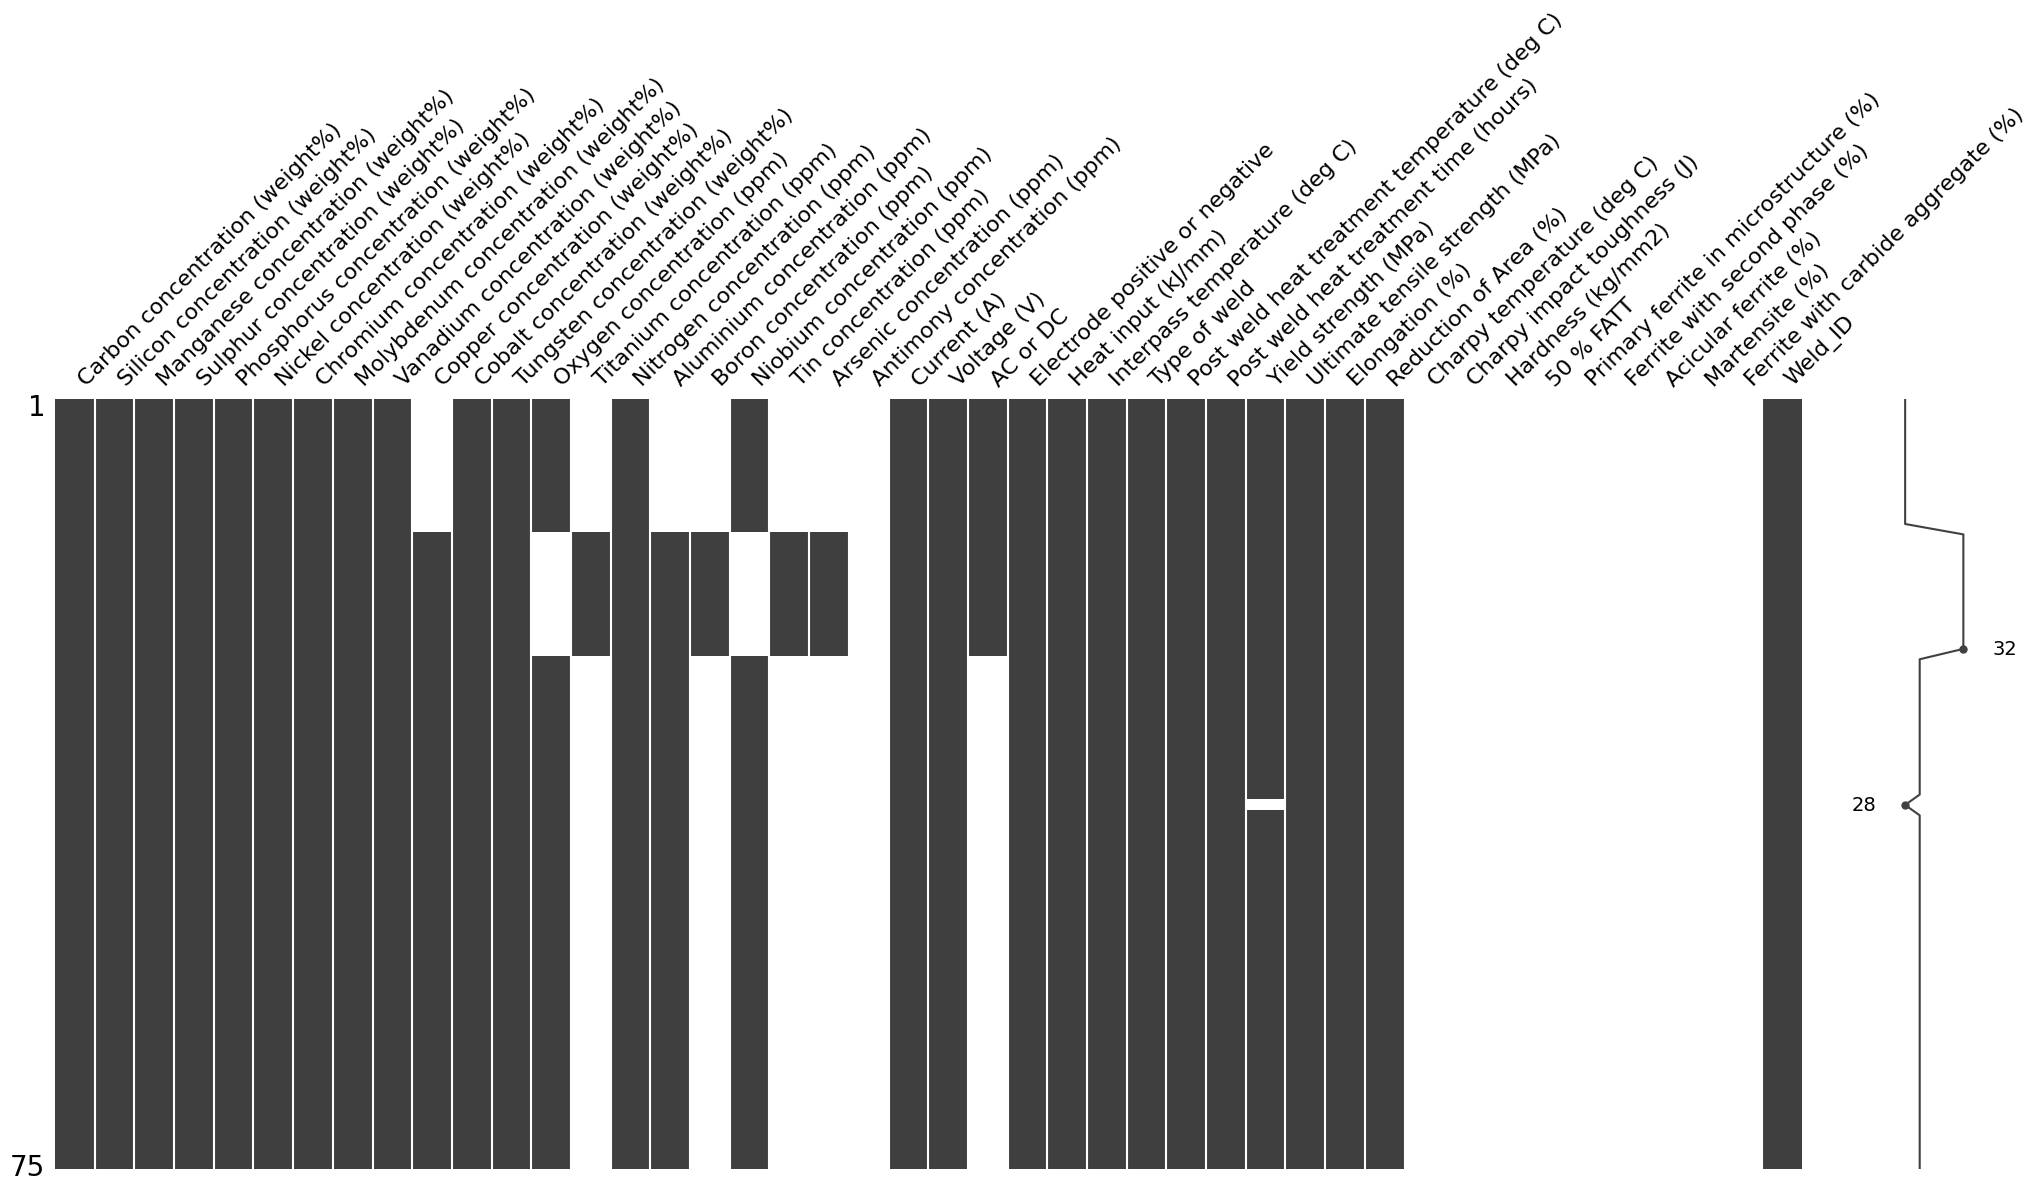

Carbon concentration (weight%)  Silicon concentration (weight%)  \
719                            0.099                             0.17   
720                            0.093                             0.16   
721                            0.101                             0.17   
722                            0.095                             0.16   
723                            0.096                             0.16   
...                              ...                              ...   
1482                           0.072                             1.08   
1483                           0.071                             0.84   
1484                           0.071                             0.84   
1485                           0.077                             0.64   
1486                           0.077                             0.64   

      Manganese concentration (weight%)  Sulphur concentration (weight%)  \
719                                1.01                            0.007   
720                                1.03                            0.008   
721                                1.02                            0.008   
722                                1.02                            0.007   
723                                1.01                            0.007   
...                                 ...                              ...   
1482                               1.71                            0.015   
1483                               1.53                            0.012   
1484                               1.53                            0.012   
1485                               1.43                            0.013   
1486                               1.43                            0.013   

      Phosphorus concentration (weight%)  Nickel concentration (weight%)  \
719                                0.012                            0.08   
720                                0.012                            0.98   
721                                0.012                            1.92   
722                                0.012                            3.01   
723                                0.013                            0.00   
...                                  ...                             ...   
1482                               0.028                            0.00   
1483                               0.022                            0.00   
1484                               0.022                            0.00   
1485                               0.017                            0.00   
1486                               0.017                            0.00   

      Chromium concentration (weight%)  Molybdenum concentration (weight%)  \
719                               9.30                                1.00   
720                               9.08                                0.98   
721                               9.12                                1.00   
722                               9.17                                0.96   
723                               9.16                                0.99   
...                                ...                                 ...   
1482                              0.00                                0.00   
1483                              0.00                                0.00   
1484                              0.00                                0.00   
1485                              0.00                                0.00   
1486                              0.00                                0.00   

      Vanadium concentration (weight%)  Copper concentration (weight%)  ...  \
719                               0.20                             NaN  ...   
720                               0.19                             NaN  ...   
721                               0.19                             NaN  ...   
722                               0.19            

In [38]:
import missingno as msno

def filter_and_display_missing_map(df, column_name):
    # Filtrer les lignes où la colonne spécifiée n'a pas de NaN
    df_filtered = df[df[column_name].notna()]
    
    # Afficher la carte des valeurs manquantes avec missingno
    plt.figure(figsize=(12,8))
    msno.matrix(df_filtered)
    plt.tight_layout()
    plt.show()

    return df_filtered

#filter_and_display_missing_map(df,"Acicular ferrite (%)")
#filter_and_display_missing_map(df,"Tin concentration (ppm)")
filter_and_display_missing_map(df,'Hardness (kg/mm2)')
filter_and_display_missing_map(df,"Tungsten concentration (weight%)")


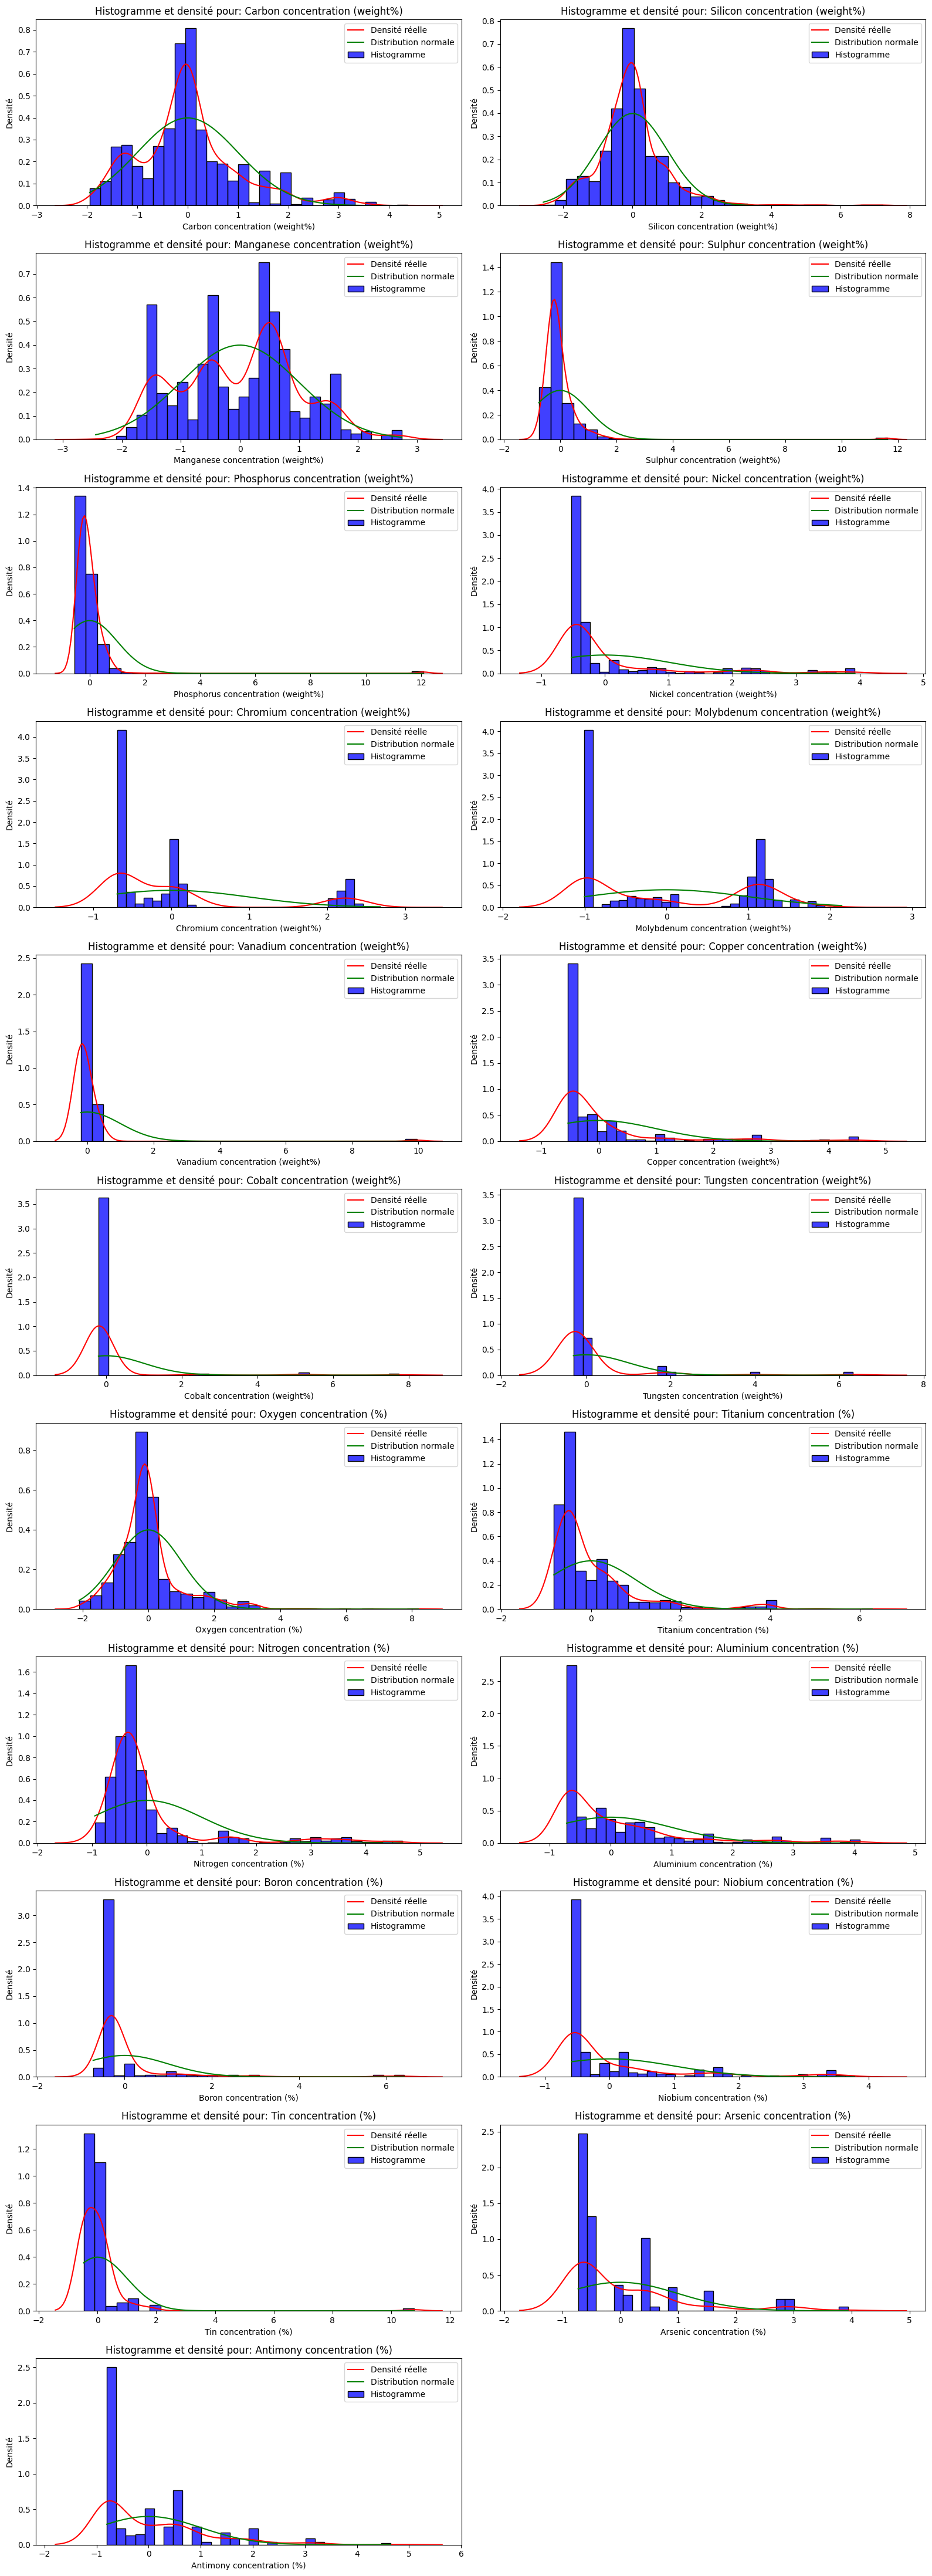

In [39]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def scale(X,scaler=MinMaxScaler()) :
    scaler = scaler
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled

def plot_histograms_with_frequency(df):
    """
    Cette fonction parcourt chaque colonne numérique du DataFrame,
    et affiche les histogrammes avec courbes de densité dans une grille
    de sous-graphes avec 2 colonnes. L'axe des ordonnées affiche le nombre
    d'occurrences (la fréquence) plutôt que la densité.
    
    Paramètres:
    - df: pandas DataFrame contenant les données à analyser
    """
    # Sélectionner uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    num_columns = len(numeric_columns)

    # Calculer le nombre de lignes nécessaire pour les sous-graphes
    num_rows = (num_columns + 1) // 2  # 2 colonnes, donc (n/2) lignes

    # Créer une figure avec subplots de taille ajustée (2 colonnes)
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

    # Aplatir les axes pour un accès plus facile
    axes = axes.flatten()

    # Itérer sur chaque colonne numérique du DataFrame
    for i, column in enumerate(numeric_columns):
        data = df[column].dropna()  # Enlever les valeurs manquantes (NaN)
        
        # Afficher l'histogramme avec le nombre d'occurrences (fréquence)
        sns.histplot(data, kde=False, color='blue', bins=30, ax=axes[i], label='Histogramme')

        # Calculer la moyenne et l'écart-type pour la courbe de densité gaussienne
        mean = data.mean()
        std = data.std()

        # Tracer la courbe de densité réelle
        sns.kdeplot(data, color='red', ax=axes[i], label='Densité réelle')

        # Tracer la courbe de la distribution normale théorique
        x = np.linspace(data.min(), data.max(), 100)
        y = norm.pdf(x, mean, std) * len(data) * (data.max() - data.min()) / 30  # Ajuster pour la fréquence
        axes[i].plot(x, y, label='Distribution normale', color='green')

        # Ajouter des étiquettes et un titre
        axes[i].set_title(f'Histogramme et densité pour: {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Fréquence')  # L'axe des ordonnées est maintenant la fréquence
        axes[i].legend()

    # Supprimer les sous-graphes inutilisés si le nombre de colonnes est impair
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'espace entre les sous-graphes
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

def plot_histograms_with_density(df):
    """
    Cette fonction parcourt chaque colonne numérique du DataFrame,
    et affiche les histogrammes avec courbes de densité dans une grille
    de sous-graphes avec 2 colonnes.
    
    Paramètres:
    - df: pandas DataFrame contenant les données à analyser
    """
    # Sélectionner uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    num_columns = len(numeric_columns)

    # Calculer le nombre de lignes nécessaire pour les sous-graphes
    num_rows = (num_columns + 1) // 2  # 2 colonnes, donc (n/2) lignes

    # Créer une figure avec subplots de taille ajustée (2 colonnes)
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

    # Aplatir les axes pour un accès plus facile
    axes = axes.flatten()

    # Itérer sur chaque colonne numérique du DataFrame
    for i, column in enumerate(numeric_columns):
        data = df[column].dropna()  # Enlever les valeurs manquantes (NaN)
        
        # Afficher l'histogramme
        sns.histplot(data, kde=False, color='blue', stat='density', bins=30, ax=axes[i], label='Histogramme')

        # Calculer la moyenne et l'écart-type pour la courbe de densité gaussienne
        mean = data.mean()
        std = data.std()

        # Tracer la courbe de densité réelle
        sns.kdeplot(data, color='red', ax=axes[i], label='Densité réelle')

        # Tracer la courbe de la distribution normale théorique
        x = np.linspace(data.min(), data.max(), 100)
        y = norm.pdf(x, mean, std)
        axes[i].plot(x, y, label='Distribution normale', color='green')

        # Ajouter des étiquettes et un titre
        axes[i].set_title(f'Histogramme et densité pour: {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Densité')
        axes[i].legend()

    # Supprimer les sous-graphes inutilisés si le nombre de colonnes est impair
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'espace entre les sous-graphes
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()


X_std= scale(df_chemiCompo_sameUnit,scaler = StandardScaler())
plot_histograms_with_density(X_std)

In [40]:
columnToDelete = [
    "Ferrite with carbide aggregate (%)",
    "Martensite (%)" , 
    "Cobalt concentration (weight%)", 
    "Tungsten concentration (weight%)",
    #"Phosphorus concentration (weight%)",
    #"Arsenic concentration (%)",
    "50 % FATT"
]

def supprimer_colonnes(df, colonnes_a_supprimer):
    df_copy = df.copy()
    # Parcourir chaque colonne dans la liste des colonnes à supprimer
    for col in colonnes_a_supprimer:
        # Vérifier si la colonne existe dans le DataFrame
        if col in df_copy.columns:
            # Supprimer la colonne
            df_copy.drop(columns=[col], inplace=True)
            # Afficher un message de succès
            print(f"La colonne '{col}' a été supprimée avec succès.")
        else:
            # Afficher un message si la colonne n'existe pas
            print(f"La colonne '{col}' n'existe pas dans le DataFrame.")
    
    return df_copy

df_mod_same_unit = supprimer_colonnes(df_same_unit,columnToDelete)

La colonne 'Ferrite with carbide aggregate (%)' a été supprimée avec succès.
La colonne 'Martensite (%)' a été supprimée avec succès.
La colonne 'Cobalt concentration (weight%)' a été supprimée avec succès.
La colonne 'Tungsten concentration (weight%)' a été supprimée avec succès.
La colonne '50 % FATT' a été supprimée avec succès.


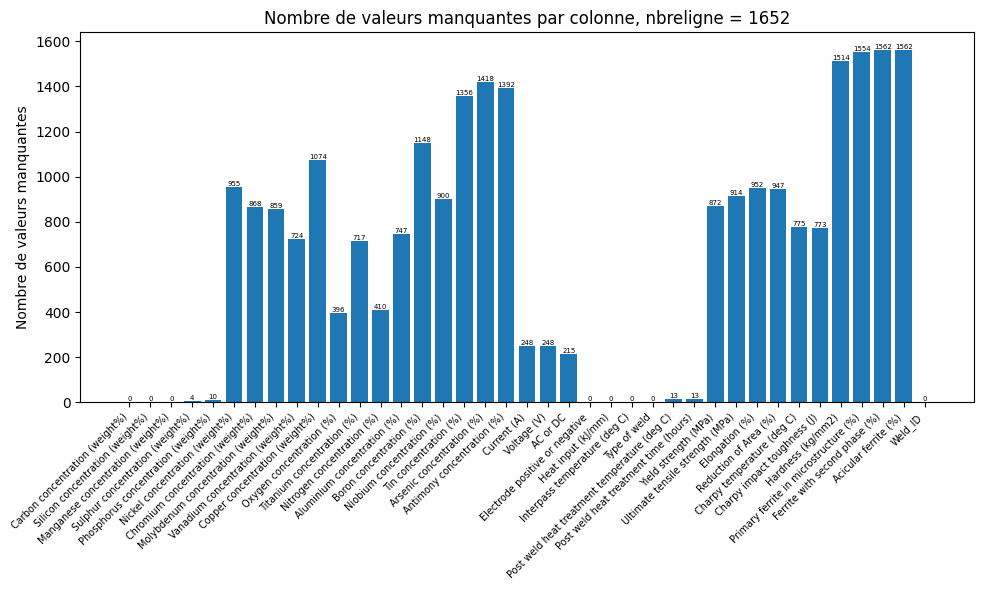

In [41]:
displayMissingValues(df_mod_same_unit)

## stochastic regression imputation

Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
Carbon concentration (weight%)        0
Silicon concentration (weight%)       0
Manganese concentration (weight%)     0
Sulphur concentration (weight%)       0
Phosphorus concentration (weight%)    0
Nickel concentration (weight%)        0
Chromium concentration (weight%)      0
Molybdenum concentration (weight%)    0
Vanadium concentration (weight%)      0
dtype: int64
1652


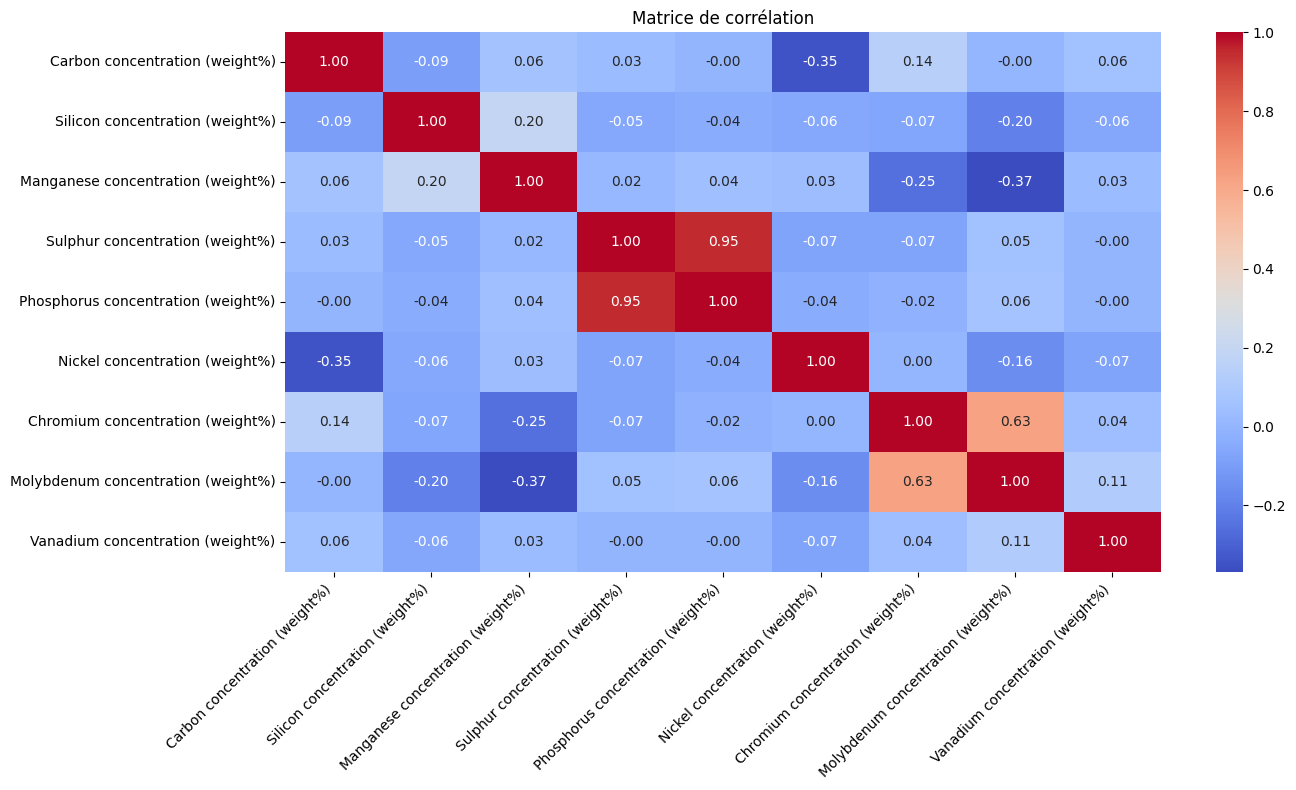

In [42]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_sti)
df_it_imp = pd.DataFrame(X_it_imp, columns=df_sti.columns)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)

## Univariate

In [43]:
s = "hello"
print(s[2:])

llo


Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
Carbon concentration (weight%)        0
Silicon concentration (weight%)       0
Manganese concentration (weight%)     0
Sulphur concentration (weight%)       0
Phosphorus concentration (weight%)    0
Nickel concentration (weight%)        0
Chromium concentration (weight%)      0
Molybdenum concentration (weight%)    0
Vanadium concentration (weight%)      0
dtype: int64
1652


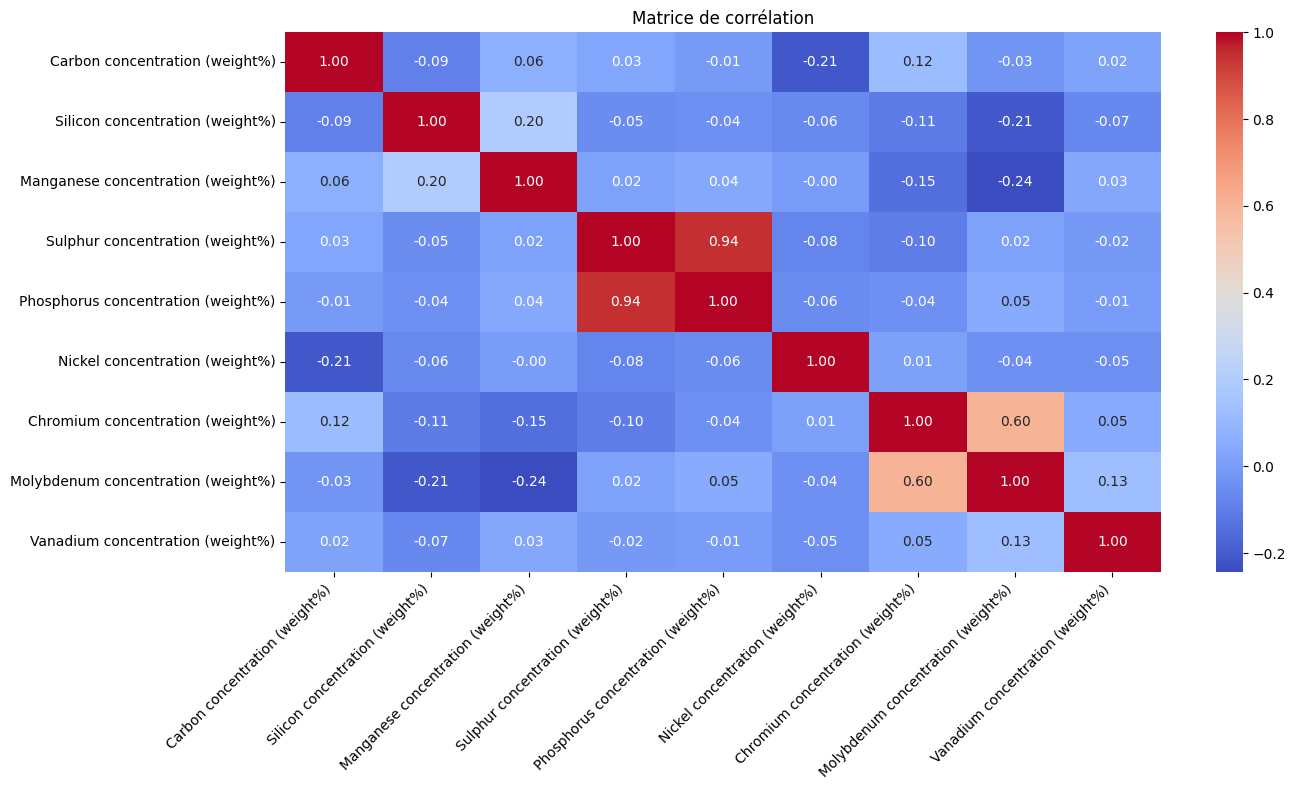

In [44]:
from sklearn.impute import SimpleImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='mean')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(df_sti)

df_it_imp = pd.DataFrame(X_mean , columns=df_sti.columns)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)

## Gestion des outliers

In [45]:
print(df_mod_same_unit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

In [46]:
def remove_outliers_iqr(df):
    # Créer une copie du DataFrame pour ne pas modifier l'original
    df_cleaned = df.copy()

    # Parcourir chaque colonne numérique du DataFrame
    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer les quartiles Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        # Calculer l'IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Définir les bornes pour identifier les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Supprimer les lignes qui contiennent des outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        print(f"Colonne {col} : {df.shape[0]-df_cleaned.shape[0]} lignes supprimées")

    return df_cleaned

def get_outlier_indices(df, coeff = 1.5):
    # Initialiser un dictionnaire pour stocker les indices des lignes à supprimer
    outlier_indices = {}
    no_outlier_feature = []

    # Parcourir chaque colonne numérique du DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer les quartiles Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculer l'IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Définir les bornes pour identifier les outliers
        lower_bound = Q1 - coeff * IQR
        upper_bound = Q3 + coeff * IQR
        
        # Trouver les indices des lignes où la valeur est un outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        # Si des outliers sont trouvés, les ajouter au dictionnaire
        if outliers:
            outlier_indices[col] = outliers
        else :
            no_outlier_feature.append(col)

    return outlier_indices , no_outlier_feature

def get_outlier_indices_zscore(df, threshold=3):
    """
    Fonction qui retourne les indices des outliers selon le z-score et les colonnes sans outliers.
    
    Paramètres :
    - df : le DataFrame à analyser
    - threshold : seuil du z-score au-delà duquel une valeur est considérée comme un outlier (par défaut 3)
    
    Retourne :
    - outlier_indices : un dictionnaire avec les colonnes contenant des outliers et leurs indices
    - no_outlier_feature : une liste des colonnes sans outliers
    """
    # Initialiser un dictionnaire pour stocker les indices des lignes à supprimer
    outlier_indices = {}
    no_outlier_feature = []

    # Parcourir chaque colonne numérique du DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer la moyenne et l'écart-type de la colonne
        mean_col = df[col].mean()
        std_col = df[col].std()

        # Calculer le z-score pour chaque valeur de la colonne
        z_scores = (df[col] - mean_col) / std_col
        
        # Trouver les indices des lignes où la valeur a un z-score au-dessus du seuil
        outliers = df[(np.abs(z_scores) > threshold)].index.tolist()
        
        # Si des outliers sont trouvés, les ajouter au dictionnaire
        if outliers:
            outlier_indices[col] = outliers
        else:
            no_outlier_feature.append(col)

    return outlier_indices, no_outlier_feature

# Dans le dataframe suivant je ne prends pas les colonnes :Boron et interpass temperature 
# car elles sont telement dispersé les valeurs que ça supprime trop de ligne
#df_test_chemi = df_mod_same_unit.iloc[:,list(range(14)) + list(range(15,21)) + [23] + list(range(26, 39))]

df_test_chemi = df_mod_same_unit.iloc[:,list(range(21)) + [23,24] + list(range(26, 39))]
dico_indice_outliers, no_outlier_feature = get_outlier_indices(df_test_chemi,1.5)
#print(df_test_chemi.shape[1])
#print(len(dico_indice_outliers))
#print(no_outlier_feature)

dico_zscore , no_outlier_feature_zscore= get_outlier_indices_zscore(df_test_chemi)
print(df_test_chemi.shape[1])
print(len(dico_zscore))
print(no_outlier_feature_zscore)

#print(df_test_chemi.info())

valeurs_uniques = set()
for cle, valeur in dico_zscore.items():
    valeurs_uniques.update(valeur)
    # Vérifier que la valeur est une liste
    if isinstance(valeur, list):
        # Afficher la clé et la longueur de la liste
        print(f"Clé : {cle}, Longueur de la liste : {len(valeur)}")

print("Valeurs uniques :", valeurs_uniques)
print("longeur :" , len(valeurs_uniques))

36
29
['Manganese concentration (weight%)', 'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 'Post weld heat treatment temperature (deg C)', 'Primary ferrite in microstructure (%)', 'Acicular ferrite (%)']
Clé : Carbon concentration (weight%), Longueur de la liste : 18
Clé : Silicon concentration (weight%), Longueur de la liste : 20
Clé : Sulphur concentration (weight%), Longueur de la liste : 10
Clé : Phosphorus concentration (weight%), Longueur de la liste : 12
Clé : Nickel concentration (weight%), Longueur de la liste : 25
Clé : Vanadium concentration (weight%), Longueur de la liste : 9
Clé : Copper concentration (weight%), Longueur de la liste : 16
Clé : Oxygen concentration (%), Longueur de la liste : 28
Clé : Titanium concentration (%), Longueur de la liste : 34
Clé : Nitrogen concentration (%), Longueur de la liste : 59
Clé : Aluminium concentration (%), Longueur de la liste : 22
Clé : Boron concentration (%), Longueur de la liste : 10
Clé : Niobium conc

In [47]:
def display_boxplots_two_dfs(df1, df2):
    # Vérifier que les deux DataFrames ont les mêmes colonnes
    if set(df1.columns) != set(df2.columns):
        raise ValueError("Les DataFrames doivent avoir les mêmes colonnes.")
    
    # Compteur pour savoir combien de boxplots ont été affichés
    plot_count = 0
    num_columns = len(df1.columns)
    
    # Création d'une figure avec 2 sous-graphes par ligne (2 colonnes)
    fig, axes = plt.subplots(nrows=(num_columns + 1), ncols=2, figsize=(6, (num_columns + 1) // 2 * 5))
    
    # Aplatir les axes (au cas où il y ait plusieurs lignes de sous-graphiques)
    axes = axes.flatten()
    
    # Parcourir chaque colonne des DataFrames
    for i, col in enumerate(df1.columns):
        # Retirer les valeurs NaN de la colonne du premier DataFrame
        non_nan_values_df1 = df1[col].dropna()
        
        # Retirer les valeurs NaN de la colonne du deuxième DataFrame
        non_nan_values_df2 = df2[col].dropna()
        
        # Créer un boxplot pour la colonne du premier DataFrame dans l'axe correspondant
        axes[plot_count].boxplot(non_nan_values_df1)
        axes[plot_count].set_title(f"Boxplot de {col} (df1)", fontsize=8)
        axes[plot_count].set_xlabel(col)
        
        # Créer un boxplot pour la colonne du deuxième DataFrame dans l'axe suivant
        axes[plot_count + 1].boxplot(non_nan_values_df2)
        axes[plot_count + 1].set_title(f"Boxplot de {col} (df2)", fontsize=8)
        axes[plot_count + 1].set_xlabel(col)
        
        # Incrémenter le compteur de boxplots de 2
        plot_count += 2
        
        # Vérifier si on a dépassé le nombre de colonnes et sortir de la boucle
        if plot_count >= len(axes):
            break
    
    # Supprimer les sous-graphiques inutilisés (s'il y en a)
    for i in range(plot_count, len(axes)):
        if i < len(axes):  # Vérifier que l'index est dans les limites
            fig.delaxes(axes[i])
    
    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()


df_same_unit_cleaned_outlier = df_mod_same_unit.drop(valeurs_uniques)
print(df_same_unit_cleaned_outlier.shape)
#display_boxplots_two_dfs(df_same_unit_cleaned_outlier.iloc[:,:-1], df_mod_same_unit.iloc[:,:-1])

(1242, 39)


# Création Dataframe pour la régression

In [48]:
df_reg = modify_columns_ppm(df)

total_rows = df_reg.shape[0]
RED = "\033[91m"  # Rouge
RESET = "\033[0m"  # Réinitialiser la couleur
column_more80percent_missingValues = []
# Parcourir chaque colonne et calculer le pourcentage de valeurs manquantes
for column in df_reg.columns:
    missing_count = df_reg[column].isnull().sum()  # Compte des valeurs manquantes
    missing_percentage = (missing_count / total_rows) * 100  # Pourcentage
    
    # Affichage avec couleur rouge si le pourcentage est supérieur à 80%
    if missing_percentage > 80:
        print(f"Colonne: {column}, Pourcentage de valeurs manquantes: {RED}{missing_percentage:.2f}%{RESET}")
        column_more80percent_missingValues.append(column)
    else:
        print(f"Colonne: {column}, Pourcentage de valeurs manquantes: {missing_percentage:.2f}%")

print(f'Column to delete : {column_more80percent_missingValues}')

Colonne: Carbon concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Silicon concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Manganese concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Sulphur concentration (weight%), Pourcentage de valeurs manquantes: 0.24%
Colonne: Phosphorus concentration (weight%), Pourcentage de valeurs manquantes: 0.61%
Colonne: Nickel concentration (weight%), Pourcentage de valeurs manquantes: 57.81%
Colonne: Chromium concentration (weight%), Pourcentage de valeurs manquantes: 52.54%
Colonne: Molybdenum concentration (weight%), Pourcentage de valeurs manquantes: 52.00%
Colonne: Vanadium concentration (weight%), Pourcentage de valeurs manquantes: 43.83%
Colonne: Copper concentration (weight%), Pourcentage de valeurs manquantes: 65.01%
Colonne: Cobalt concentration (weight%), Pourcentage de valeurs manquantes: 92.19%
Colonne: Tungsten concentration (weight%), Pourcentage de valeurs manquante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

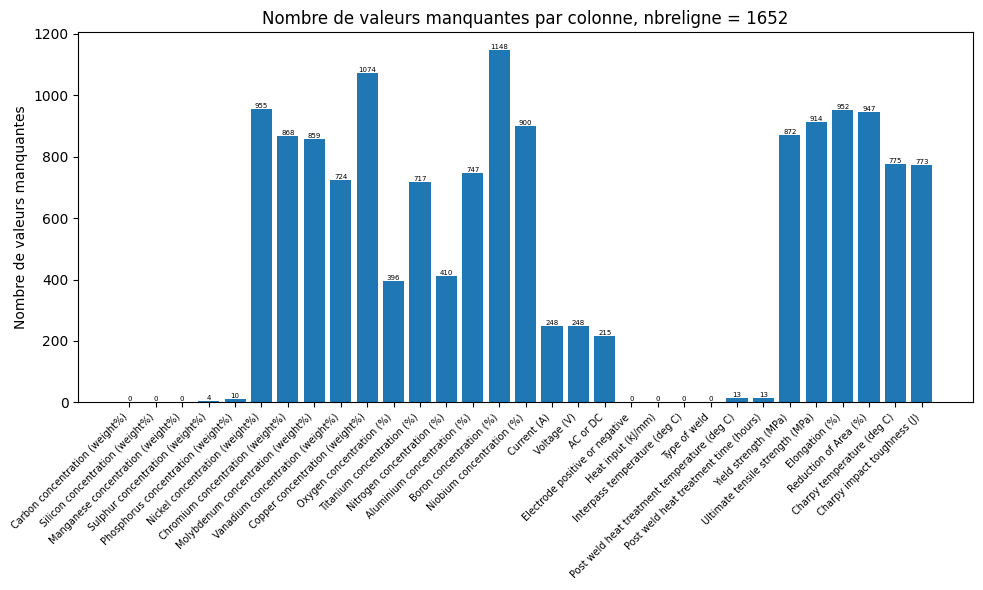

In [49]:
df_reg_dropedColumns = df_reg.drop(columns=column_more80percent_missingValues)
df_reg_dropedColumns = df_reg_dropedColumns.drop(columns="Weld_ID")
print(df_reg_dropedColumns.info())
displayMissingValues(df_reg_dropedColumns)

### Outliers de regression dataset

In [50]:
dico_zscore , no_outlier_feature_zscore= get_outlier_indices_zscore(df_reg_dropedColumns.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld']))
print(len(dico_zscore))
print(no_outlier_feature_zscore)

#print(df_test_chemi.info())

valeurs_uniques = set()
for cle, valeur in dico_zscore.items():
    valeurs_uniques.update(valeur)
    # Vérifier que la valeur est une liste
    if isinstance(valeur, list):
        # Afficher la clé et la longueur de la liste
        print(f"Clé : {cle}, Longueur de la liste : {len(valeur)}")

print("Valeurs uniques :", valeurs_uniques)
print("longeur :" , len(valeurs_uniques))

df_reg_dropedColumns_noOutliers = df_reg_dropedColumns.drop(valeurs_uniques)
print(df_reg_dropedColumns_noOutliers.index)
df_reg_dropedColumns_noOutliers = df_reg_dropedColumns_noOutliers.reset_index(drop=True) #Réinitialiser l'indexation
print(df_reg_dropedColumns_noOutliers.index)
print(df_reg_dropedColumns_noOutliers.shape)

24
['Manganese concentration (weight%)', 'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 'Post weld heat treatment temperature (deg C)']
Clé : Carbon concentration (weight%), Longueur de la liste : 18
Clé : Silicon concentration (weight%), Longueur de la liste : 20
Clé : Sulphur concentration (weight%), Longueur de la liste : 10
Clé : Phosphorus concentration (weight%), Longueur de la liste : 12
Clé : Nickel concentration (weight%), Longueur de la liste : 25
Clé : Vanadium concentration (weight%), Longueur de la liste : 9
Clé : Copper concentration (weight%), Longueur de la liste : 16
Clé : Oxygen concentration (%), Longueur de la liste : 28
Clé : Titanium concentration (%), Longueur de la liste : 34
Clé : Nitrogen concentration (%), Longueur de la liste : 59
Clé : Aluminium concentration (%), Longueur de la liste : 22
Clé : Boron concentration (%), Longueur de la liste : 10
Clé : Niobium concentration (%), Longueur de la liste : 29
Clé : Current (A), Longueur

In [51]:
X = df_reg_dropedColumns.iloc[:,:25]
X_noOutliers = df_reg_dropedColumns_noOutliers.iloc[:,:25]
y = df_reg_dropedColumns.iloc[:,25:]
y_noOutliers = df_reg_dropedColumns_noOutliers.iloc[:,25:]


X_reg_categoric = X[['AC or DC', 'Electrode positive or negative', 'Type of weld']]
X_reg_categoric_noOutliers = X_noOutliers[['AC or DC', 'Electrode positive or negative', 'Type of weld']]
print(X_reg_categoric.info())
#Récupère les features numériques
X_reg_numeric = X.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])
X_reg_numeric_noOutliers = X_noOutliers.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])
print(X_reg_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AC or DC                        1437 non-null   float64
 1   Electrode positive or negative  1652 non-null   int64  
 2   Type of weld                    1652 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 38.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               

In [52]:
def classify_columns_by_missing_data(df, threshold=0.4):
    L1 = []  # Liste pour les colonnes avec moins de 40% de valeurs manquantes
    L2 = []  # Liste pour les colonnes avec plus de 40% de valeurs manquantes
    
    # Nombre total de lignes dans le DataFrame
    total_rows = df.shape[0]
    
    # Parcourir chaque colonne du DataFrame
    for col in df.columns:
        # Calculer le pourcentage de valeurs manquantes
        missing_percentage = df[col].isnull().sum() / total_rows
        
        # Ajouter à L1 si le pourcentage de valeurs manquantes est inférieur au seuil
        if missing_percentage < threshold:
            L1.append(col)
        # Ajouter à L2 si le pourcentage de valeurs manquantes est supérieur ou égal au seuil
        else:
            L2.append(col)
    
    return L1, L2

X_columns_univariate, X_colums_multivariate = classify_columns_by_missing_data(X_reg_numeric)
print("Uni : ", X_columns_univariate)
print("Multi : " , X_colums_multivariate)

X_columns_univariate_noOutliers, X_colums_multivariate_noOutliers = classify_columns_by_missing_data(X_reg_numeric_noOutliers)
print("Uni no outliers: ", X_columns_univariate_noOutliers)
print("Multi no outliers: " , X_colums_multivariate_noOutliers)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
# --------------------------------------------------------------------------------------------
X_univariate = X_reg_numeric[X_columns_univariate] #Dataframe avec les colonnes univariate
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='median')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(X_univariate)

df_final_univariate = pd.DataFrame(X_mean , columns=X_univariate.columns)
#displayMatrixCorr(df_final_univariate)

imp_mostFrequent = SimpleImputer(strategy="most_frequent")
X_mostFrequent = imp_mostFrequent.fit_transform(X_reg_categoric)
df_final_categoric = pd.DataFrame(X_mostFrequent , columns=X_reg_categoric.columns)


df_multivariate = X_reg_numeric[X_colums_multivariate]

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_multivariate)
df_final_multivariate = pd.DataFrame(X_it_imp, columns=df_multivariate.columns)
# Remplacer les valeurs négatives par la médiane de chaque colonne
for column in df_final_multivariate.columns:
    median_value = df_final_multivariate[column].median()  # Calculer la médiane de la colonne
    df_final_multivariate[column] = np.where(df_final_multivariate[column] < 0, median_value, df_final_multivariate[column])


X_noMissingData = pd.concat([df_final_univariate, df_final_multivariate,df_final_categoric], axis=1)
print(X_noMissingData.info())

# ------------------------------------------outliers--------------------------------------------------
X_univariate = X_reg_numeric_noOutliers[X_columns_univariate_noOutliers] #Dataframe avec les colonnes univariate
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='median')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(X_univariate)

df_final_univariate = pd.DataFrame(X_mean , columns=X_univariate.columns)
#displayMatrixCorr(df_final_univariate)

imp_mostFrequent = SimpleImputer(strategy="most_frequent")
X_mostFrequent = imp_mostFrequent.fit_transform(X_reg_categoric_noOutliers)
df_final_categoric = pd.DataFrame(X_mostFrequent , columns=X_reg_categoric_noOutliers.columns)


df_multivariate = X_reg_numeric_noOutliers[X_colums_multivariate_noOutliers]

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_multivariate)
df_final_multivariate = pd.DataFrame(X_it_imp, columns=df_multivariate.columns)
# Remplacer les valeurs négatives par la médiane de chaque colonne
for column in df_final_multivariate.columns:
    median_value = df_final_multivariate[column].median()  # Calculer la médiane de la colonne
    df_final_multivariate[column] = np.where(df_final_multivariate[column] < 0, median_value, df_final_multivariate[column])


X_noMissingData_noOutliers = pd.concat([df_final_univariate, df_final_multivariate,df_final_categoric], axis=1)
print(X_noMissingData_noOutliers.info())

Uni :  ['Carbon concentration (weight%)', 'Silicon concentration (weight%)', 'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 'Phosphorus concentration (weight%)', 'Oxygen concentration (%)', 'Nitrogen concentration (%)', 'Current (A)', 'Voltage (V)', 'Heat input (kJ/mm)', 'Interpass temperature (deg C)', 'Post weld heat treatment temperature (deg C)', 'Post weld heat treatment time (hours)']
Multi :  ['Nickel concentration (weight%)', 'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 'Vanadium concentration (weight%)', 'Copper concentration (weight%)', 'Titanium concentration (%)', 'Aluminium concentration (%)', 'Boron concentration (%)', 'Niobium concentration (%)']
Uni no outliers:  ['Carbon concentration (weight%)', 'Silicon concentration (weight%)', 'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 'Phosphorus concentration (weight%)', 'Oxygen concentration (%)', 'Titanium concentration (%)', 'Nitrogen concentrat

In [53]:
#plot_histograms_with_frequency(X)
#plot_histograms_with_frequency(X_noMissingData)

In [54]:
data_regression = pd.concat([X_noMissingData, y], axis=1)
print(data_regression.shape)
data_regression_noOutliers = pd.concat([X_noMissingData_noOutliers, y_noOutliers], axis = 1)
print(data_regression_noOutliers.shape)


(1652, 31)
(1253, 31)


In [55]:
data_regression.to_csv('../4 - Dataset/regression_weld_data.csv', index=False)
data_regression_noOutliers.to_csv('../4 - Dataset/regression_weld_data_noOutliers.csv', index=False)

# Fin de créaation Dataset pour régression

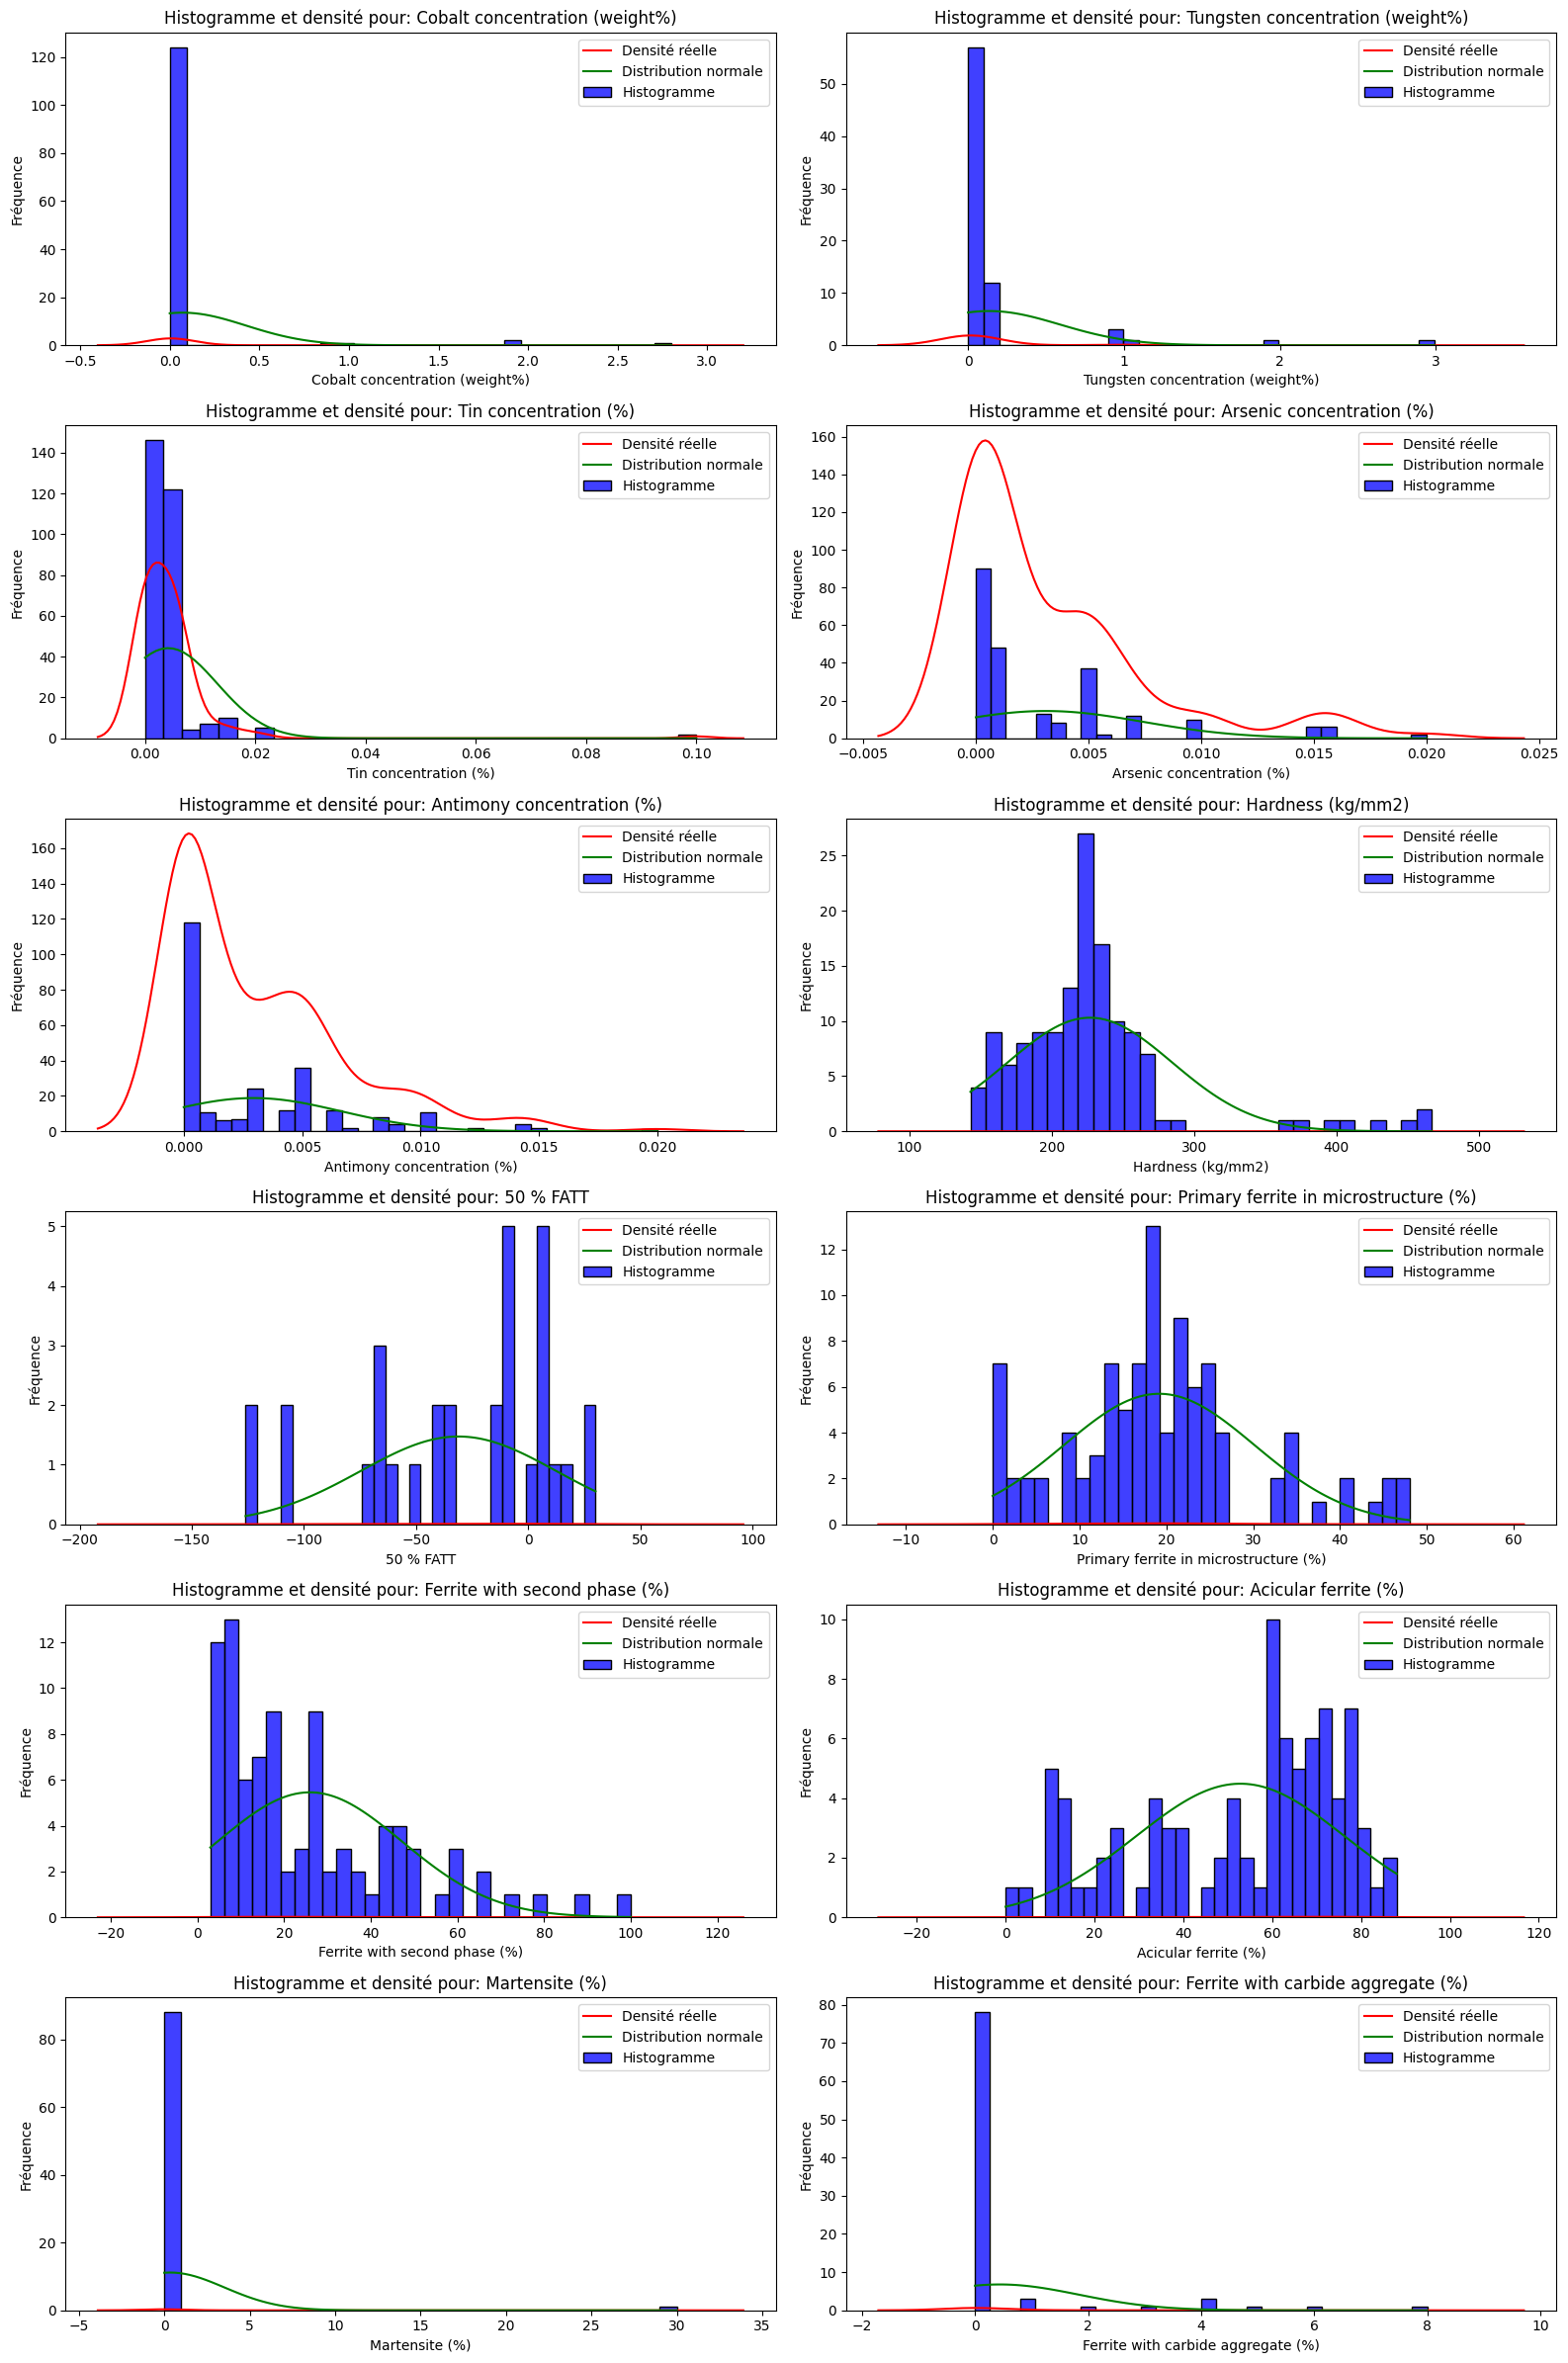

In [56]:
#plot_unique_value_histograms(df_same_unit[column_more80percent_missingValues])
plot_histograms_with_frequency(df_same_unit[column_more80percent_missingValues])

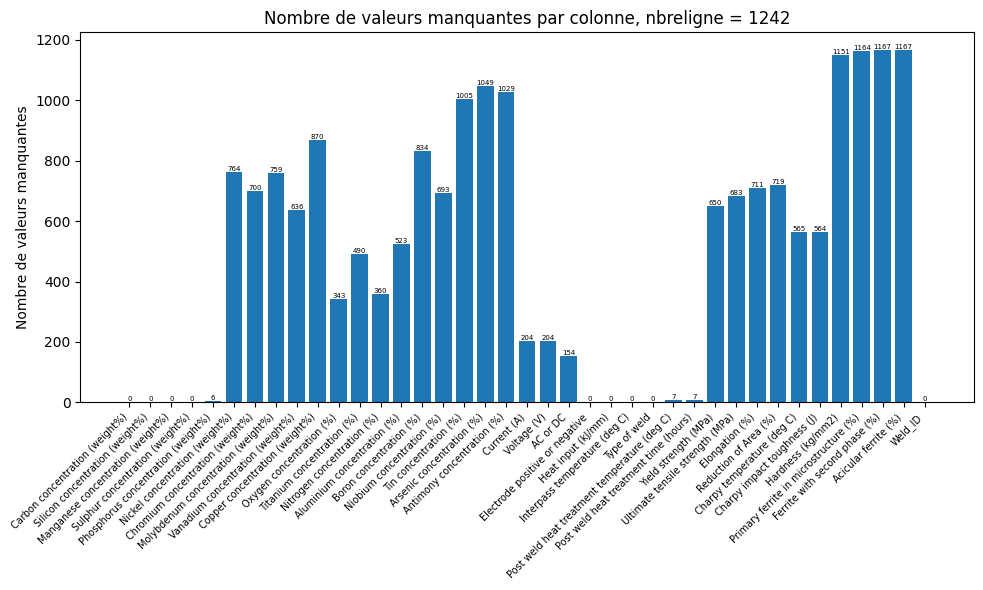

In [57]:
displayMissingValues(df_same_unit_cleaned_outlier)

In [58]:
print(df_same_unit_cleaned_outlier.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1649
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1242 non-null   float64
 1   Silicon concentration (weight%)               1242 non-null   float64
 2   Manganese concentration (weight%)             1242 non-null   float64
 3   Sulphur concentration (weight%)               1242 non-null   float64
 4   Phosphorus concentration (weight%)            1236 non-null   float64
 5   Nickel concentration (weight%)                478 non-null    float64
 6   Chromium concentration (weight%)              542 non-null    float64
 7   Molybdenum concentration (weight%)            483 non-null    float64
 8   Vanadium concentration (weight%)              606 non-null    float64
 9   Copper concentration (weight%)                372 non-null    float6

In [59]:

#Récupère dans un dataframe les features catégoriques
df_same_unit_cleaned_outlier_categoric = df_same_unit_cleaned_outlier[['AC or DC', 'Electrode positive or negative', 'Type of weld', 'Weld_ID']]
#Récupère les features numériques
df_same_unit_cleaned_outlier_numeric = df_same_unit_cleaned_outlier.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld', 'Weld_ID'])
#Récupère une liste des noms des colonnes à appliquer le Univariate ou le multivariate
columns_univariate, colums_multivariate = classify_columns_by_missing_data(df_same_unit_cleaned_outlier_numeric)


from sklearn.impute import SimpleImputer
df_univariate = df_same_unit_cleaned_outlier_numeric[columns_univariate] #Dataframe avec les colonnes univariate
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='median')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(df_univariate)

df_final_univariate = pd.DataFrame(X_mean , columns=df_univariate.columns)
#displayMatrixCorr(df_final_univariate)

imp_mostFrequent = SimpleImputer(strategy="most_frequent")
X_mostFrequent = imp_mostFrequent.fit_transform(df_same_unit_cleaned_outlier_categoric)
df_final_categoric = pd.DataFrame(X_mostFrequent , columns=df_same_unit_cleaned_outlier_categoric.columns)


from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
df_multivariate = df_same_unit_cleaned_outlier_numeric[colums_multivariate]

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_multivariate)
df_final_multivariate = pd.DataFrame(X_it_imp, columns=df_multivariate.columns)
#displayMatrixCorr(df_multivariate)

df_final = pd.concat([df_final_univariate, df_final_multivariate,df_final_categoric], axis=1)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1242 non-null   float64
 1   Silicon concentration (weight%)               1242 non-null   float64
 2   Manganese concentration (weight%)             1242 non-null   float64
 3   Sulphur concentration (weight%)               1242 non-null   float64
 4   Phosphorus concentration (weight%)            1242 non-null   float64
 5   Oxygen concentration (%)                      1242 non-null   float64
 6   Titanium concentration (%)                    1242 non-null   float64
 7   Nitrogen concentration (%)                    1242 non-null   float64
 8   Current (A)                                   1242 non-null   float64
 9   Voltage (V)                                   1242 non-null   f

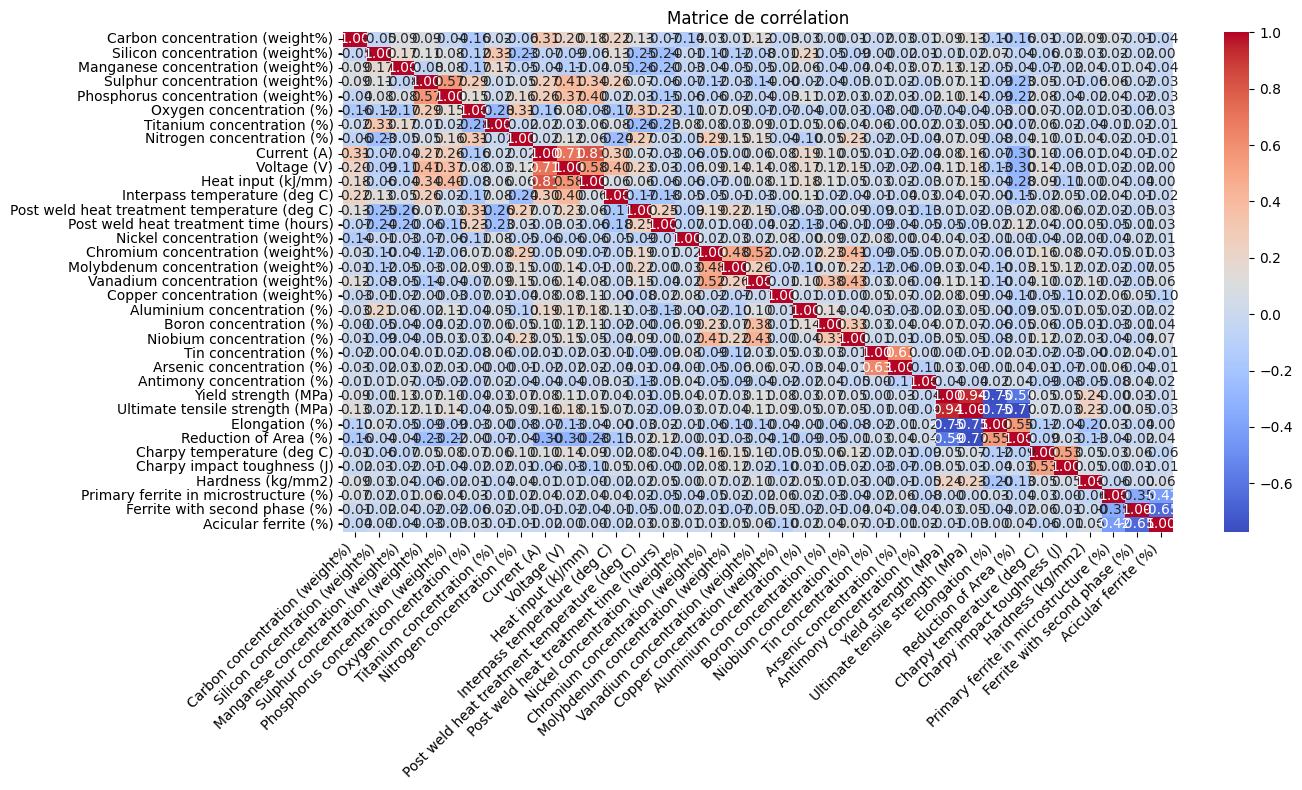

In [60]:
displayMatrixCorr(df_final.iloc[:,:35])

In [61]:
df_final.to_csv('weld_data_preprocessing1.0.csv', index=False)